In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


from sklearn import tree
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier


seaborn.set_style("whitegrid", {'axes.grid' : False})

In [2]:
data = pd.read_csv("../datasets/mnist/mnist_train.csv")

In [3]:
labels = data.ix[:,[0]]
#print labels
features = data.drop(['0'],axis=1)
print features

       5  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...    0.608  0.609  \
0      0    0    0    0    0    0    0    0    0    0  ...        0      0   
1      4    0    0    0    0    0    0    0    0    0  ...        0      0   
2      1    0    0    0    0    0    0    0    0    0  ...        0      0   
3      9    0    0    0    0    0    0    0    0    0  ...        0      0   
4      2    0    0    0    0    0    0    0    0    0  ...        0      0   
5      1    0    0    0    0    0    0    0    0    0  ...        0      0   
6      3    0    0    0    0    0    0    0    0    0  ...        0      0   
7      1    0    0    0    0    0    0    0    0    0  ...        0      0   
8      4    0    0    0    0    0    0    0    0    0  ...        0      0   
9      3    0    0    0    0    0    0    0    0    0  ...        0      0   
10     5    0    0    0    0    0    0    0    0    0  ...        0      0   
11     3    0    0    0    0    0    0    0    0    0  ...      

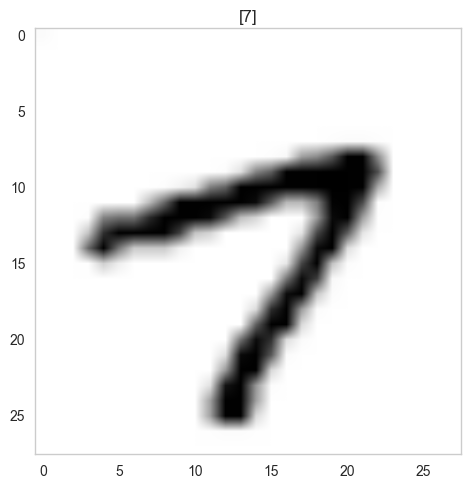

In [4]:
idx = 100
bilder = np.reshape(features.values[idx],(28,28))
plt.imshow(bilder)
plt.title(labels.values[idx])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data,train_target,  test_target = train_test_split(features.values[:10000], labels[:10000].values, test_size=0.33, random_state=42)

In [6]:
clf = KNeighborsClassifier()
clf.fit(train_data,train_target.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target.ravel()).mean()

Accuracy score: 0.941818


(192L, 784L)


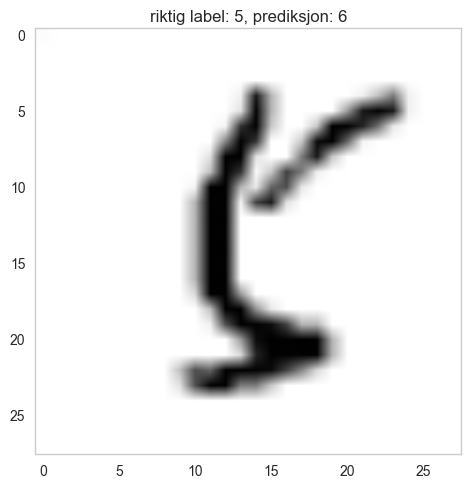

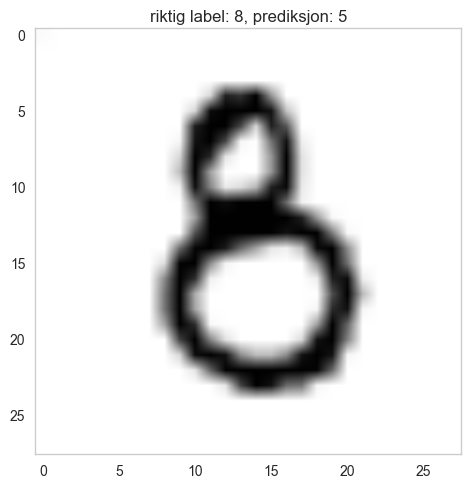

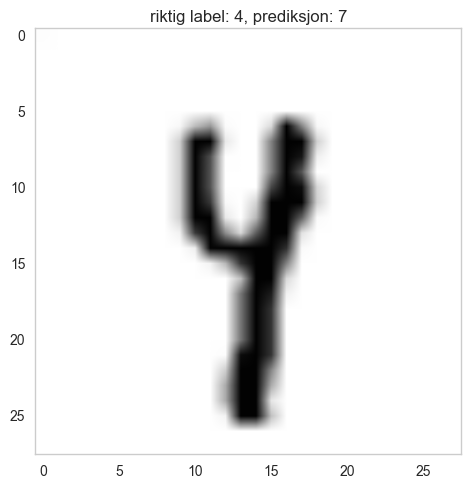

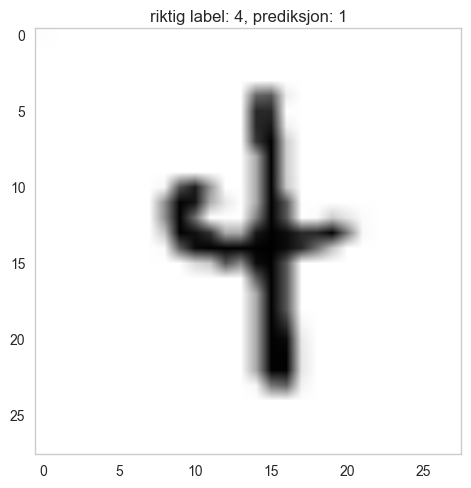

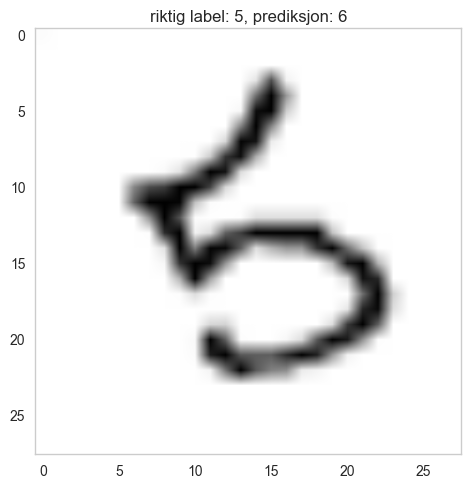

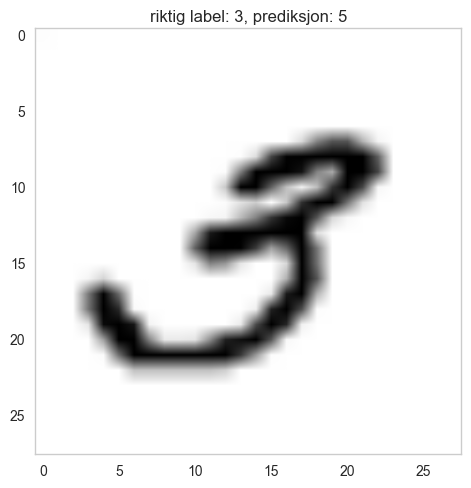

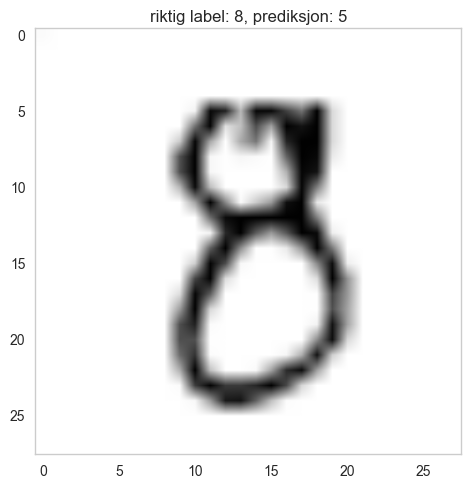

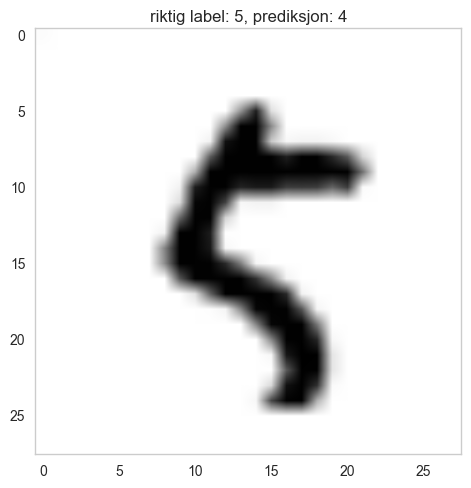

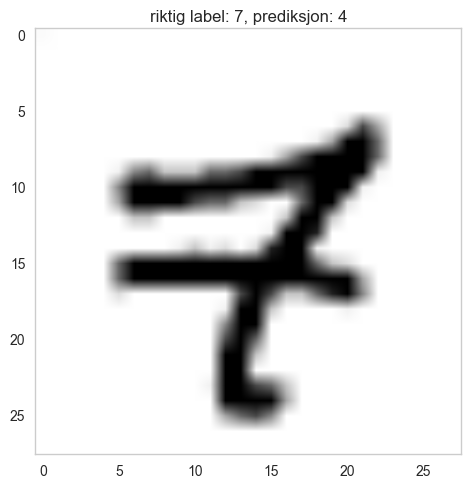

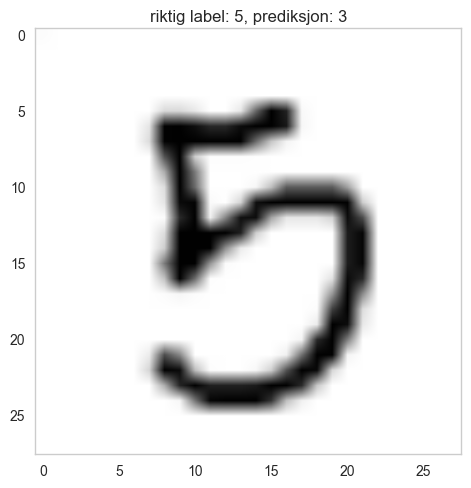

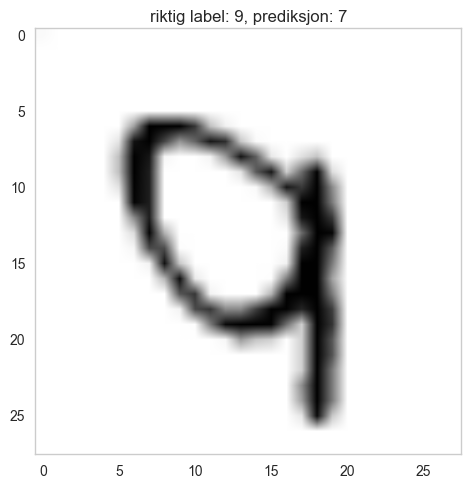

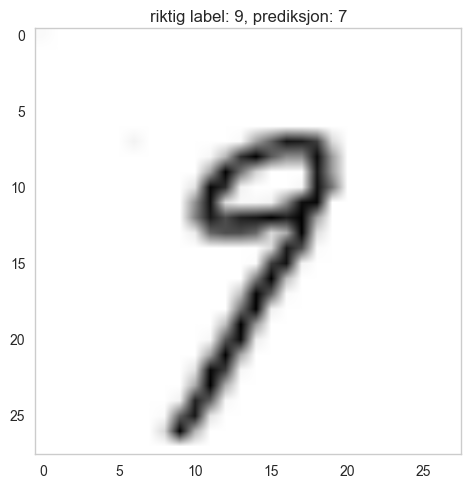

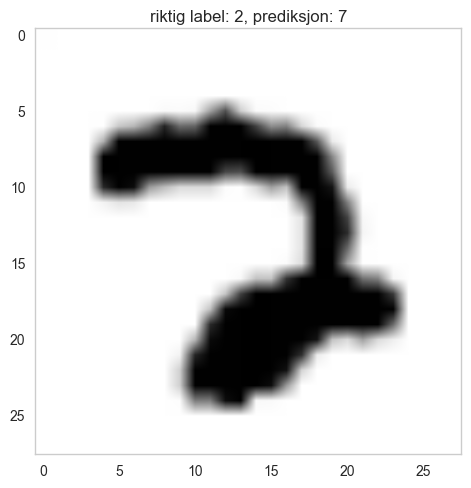

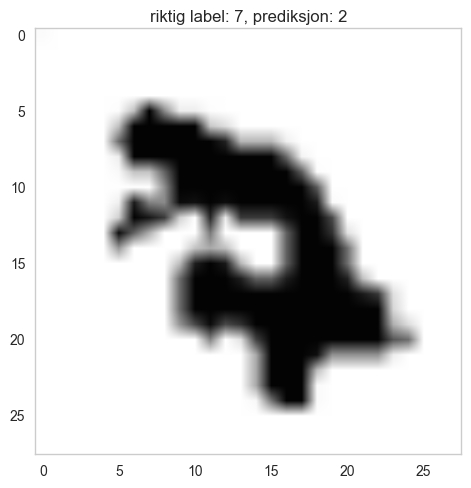

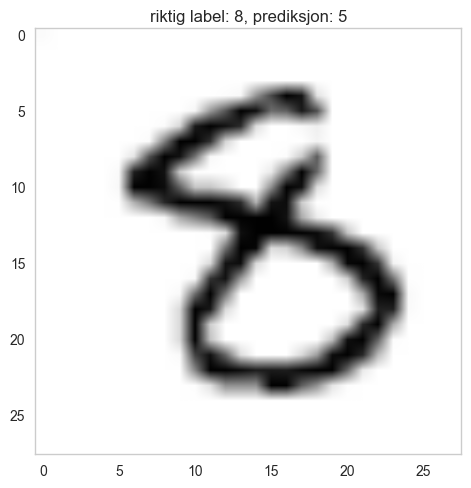

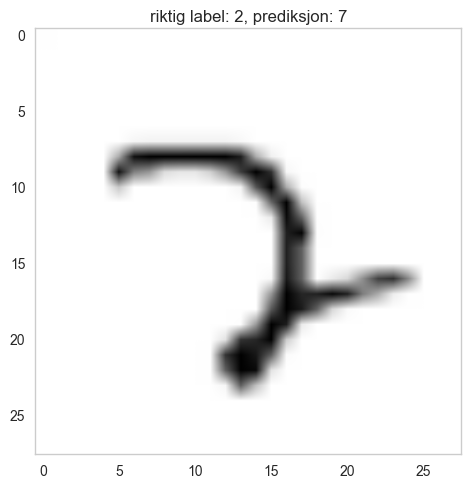

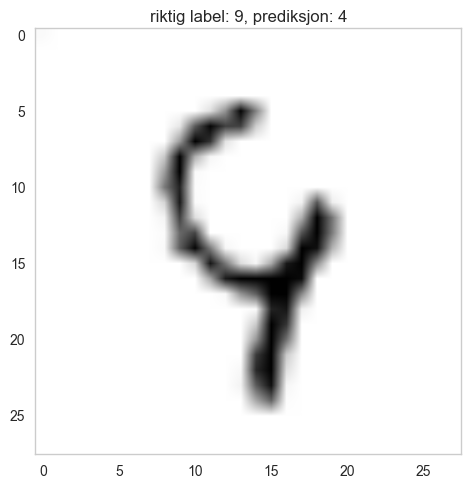

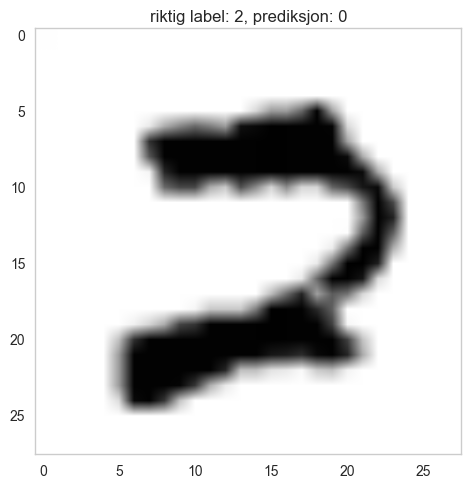

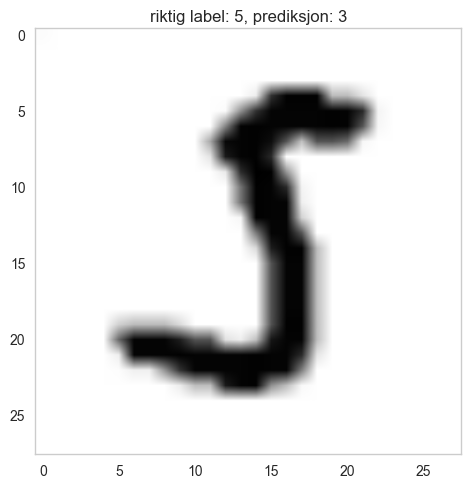

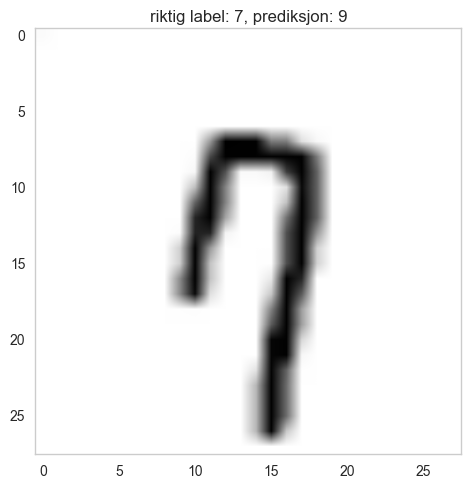

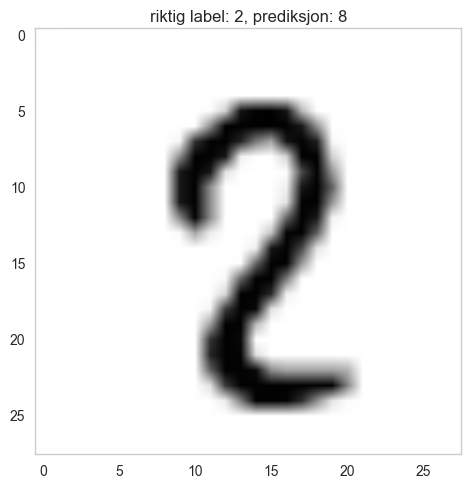

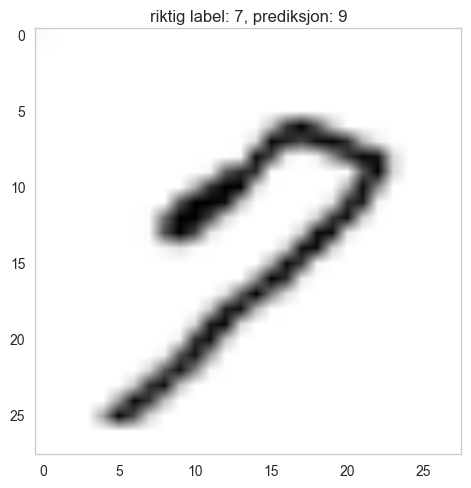

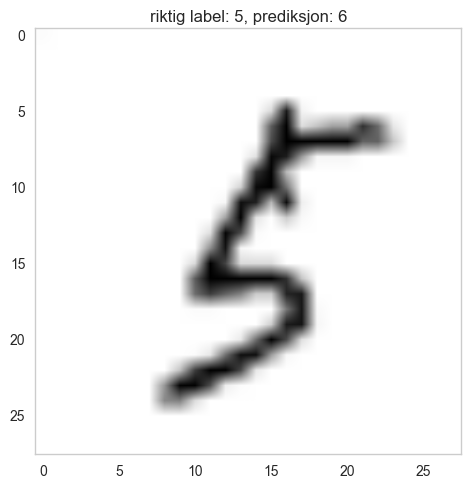

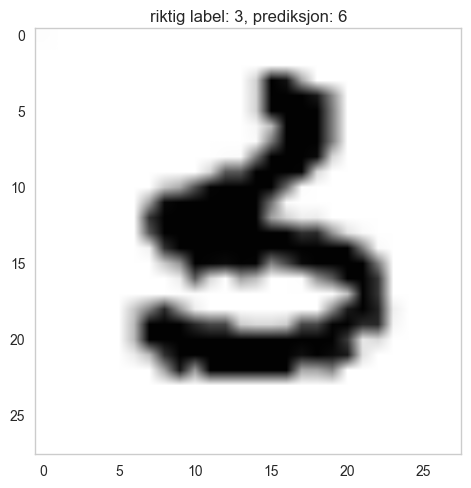

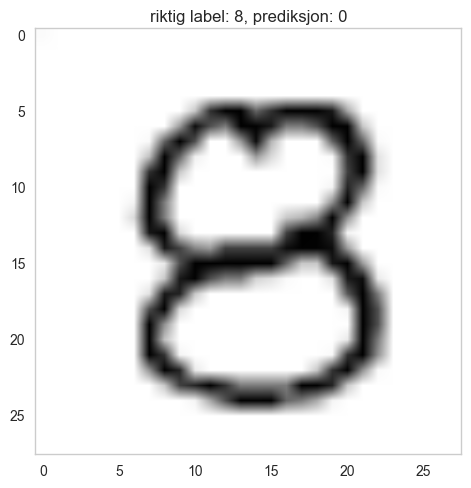

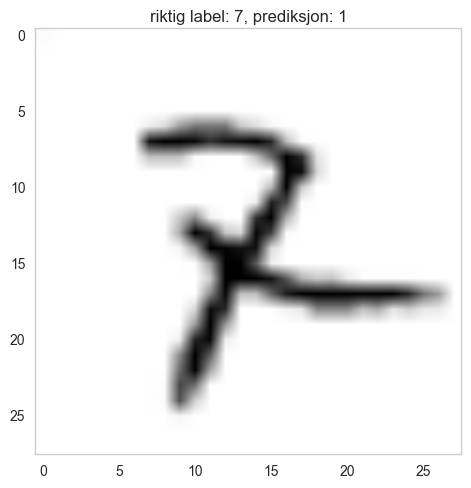

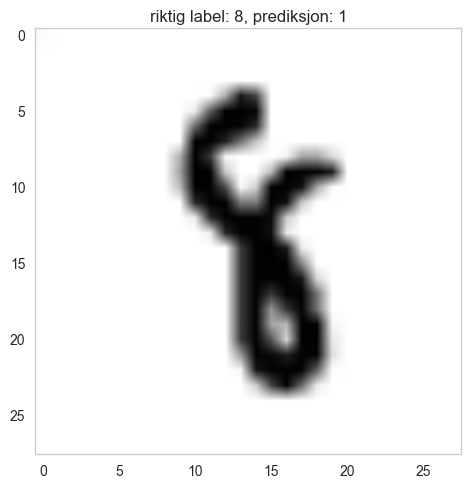

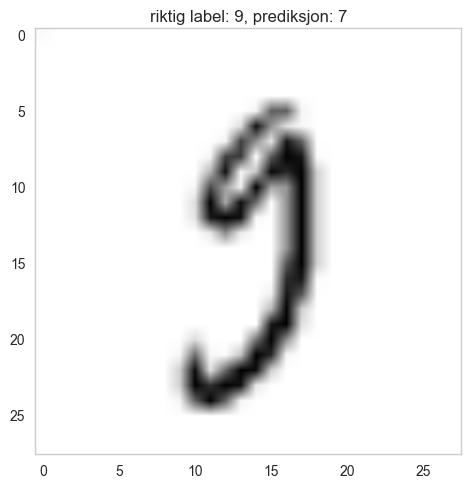

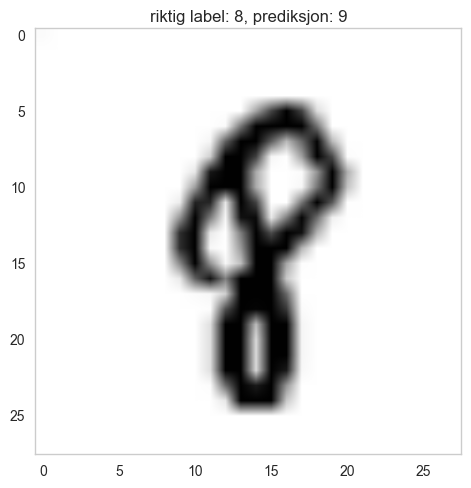

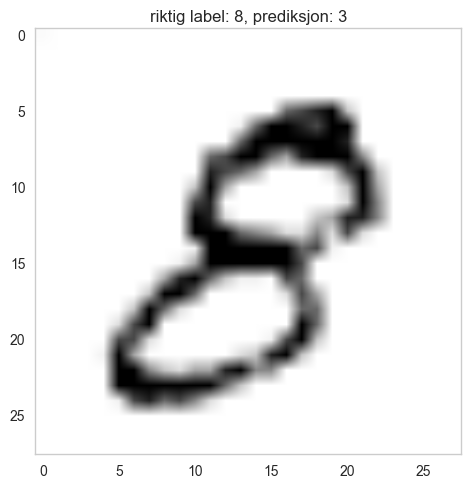

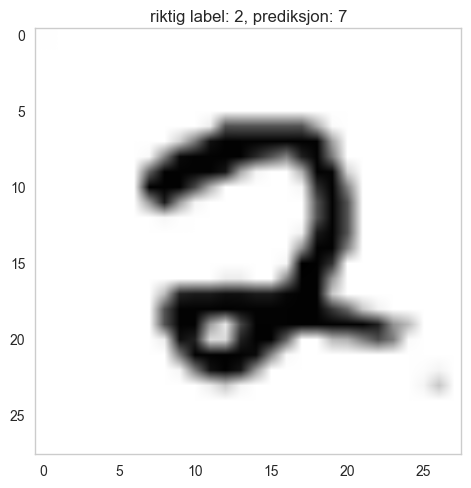

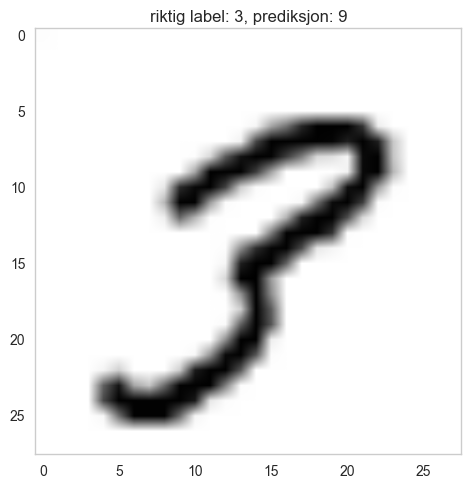

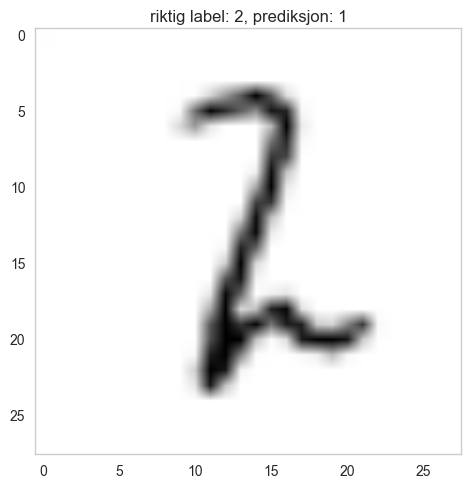

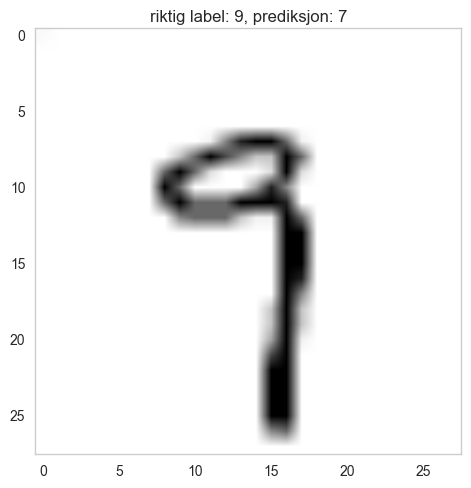

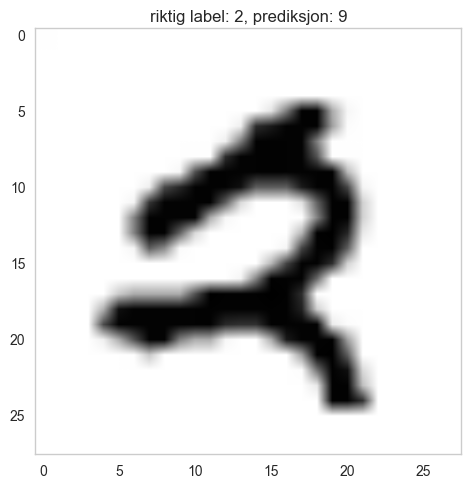

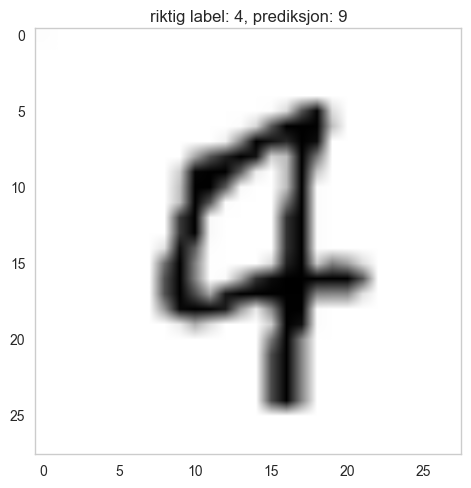

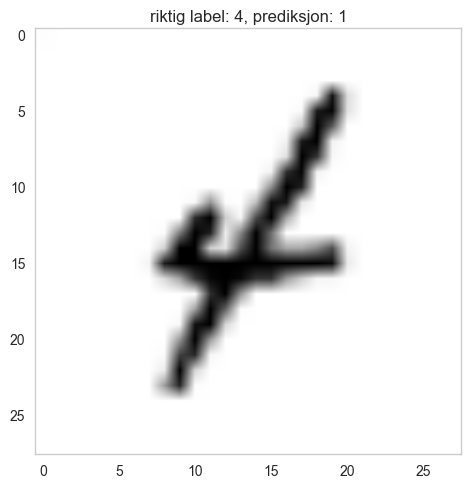

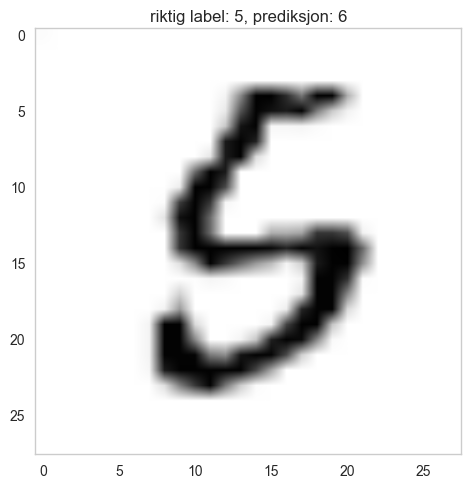

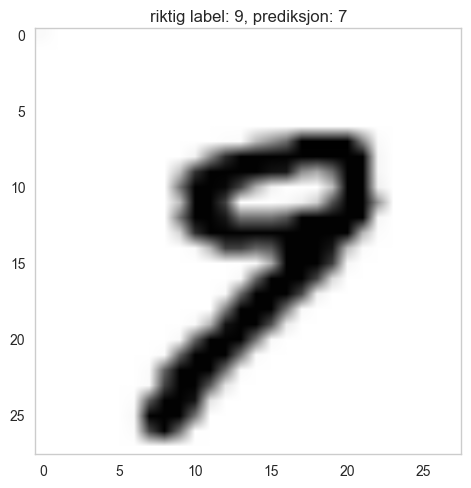

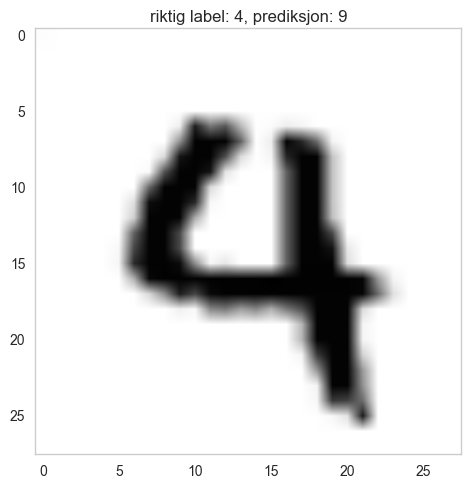

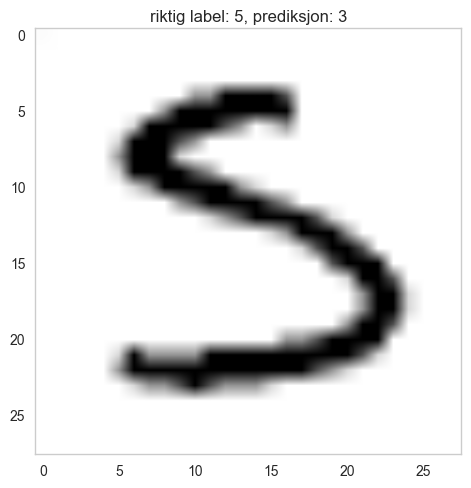

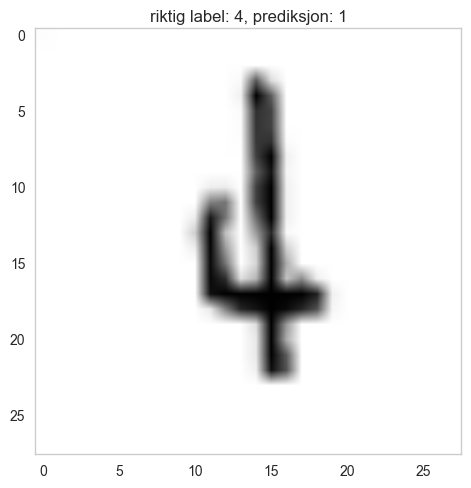

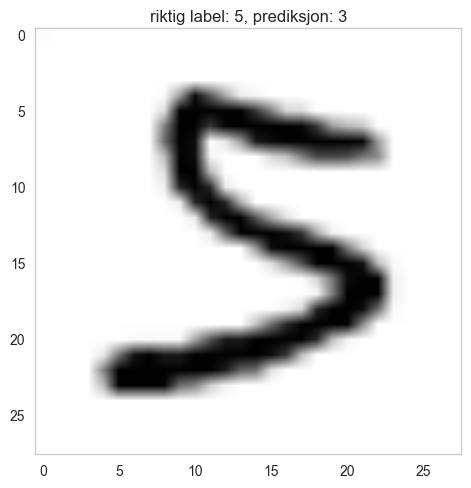

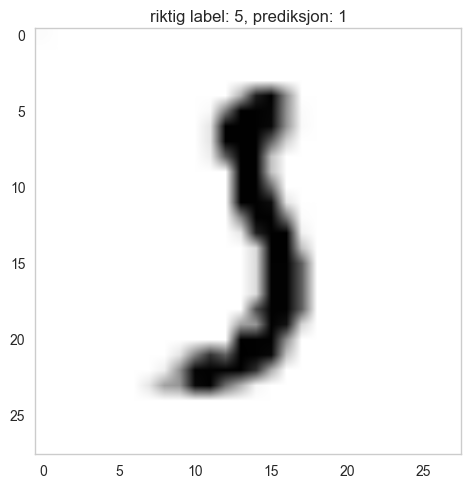

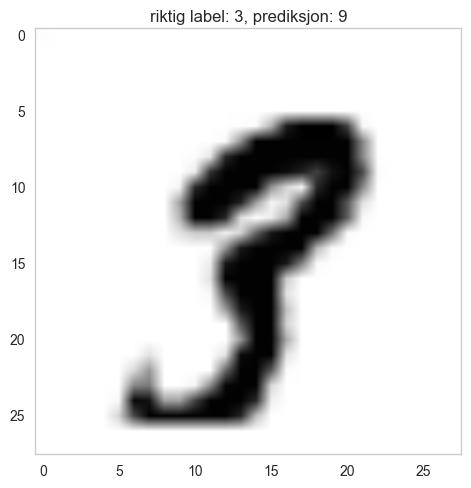

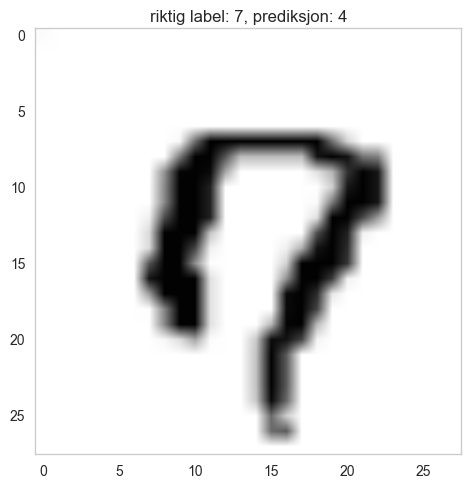

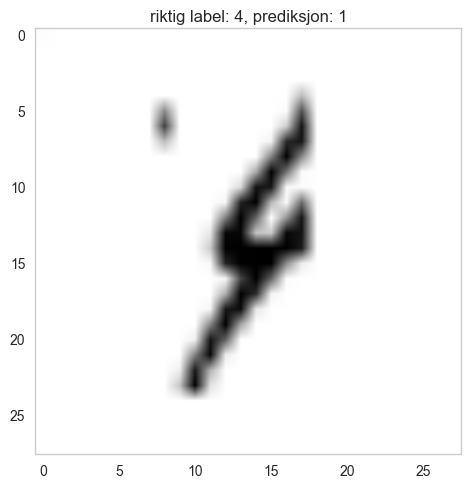

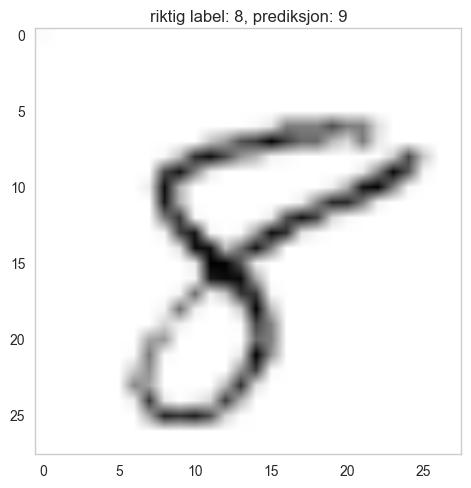

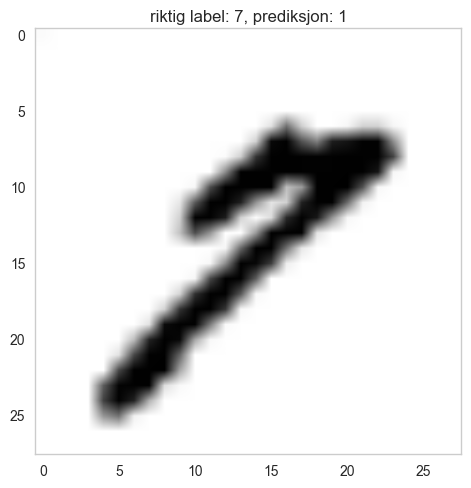

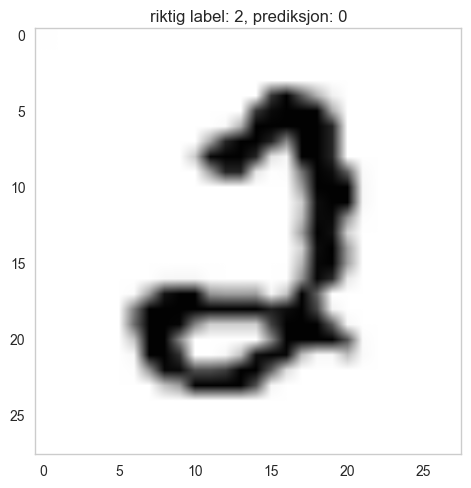

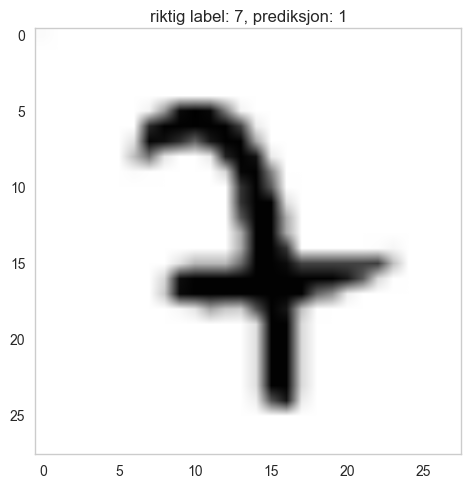

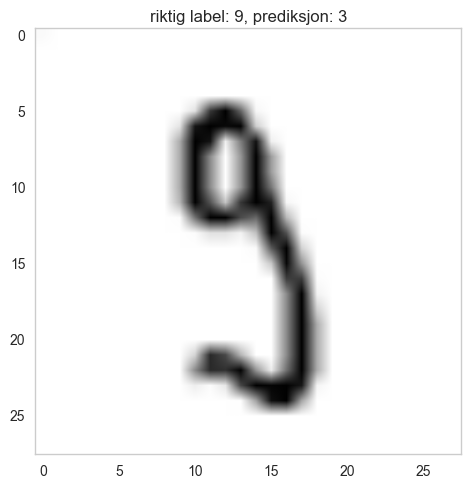

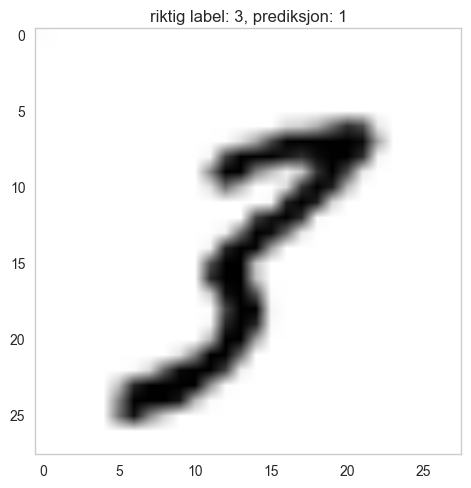

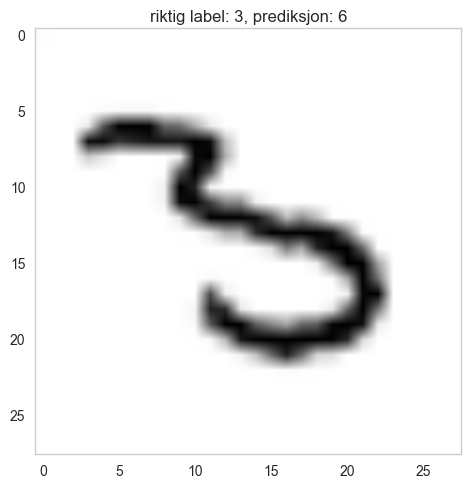

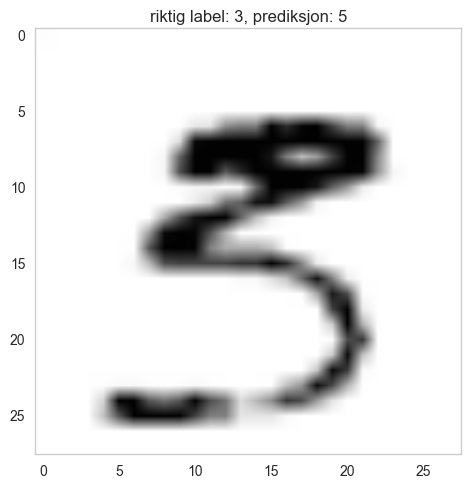

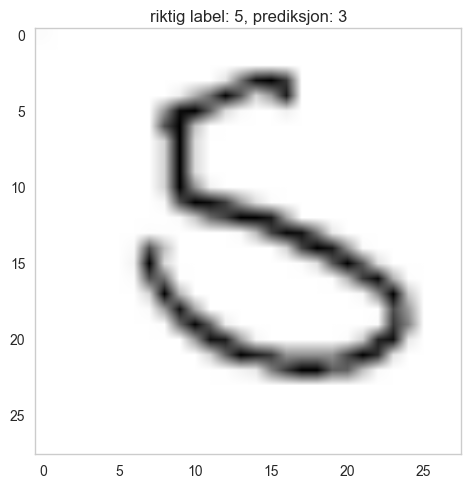

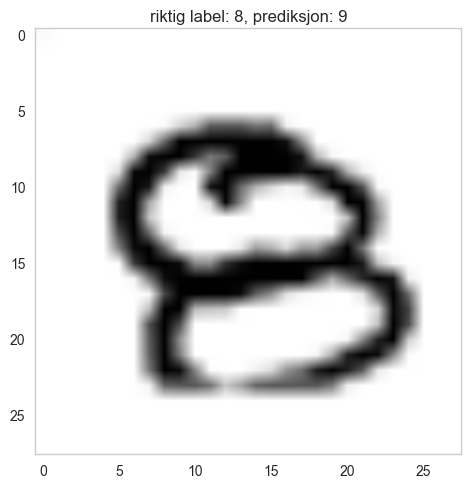

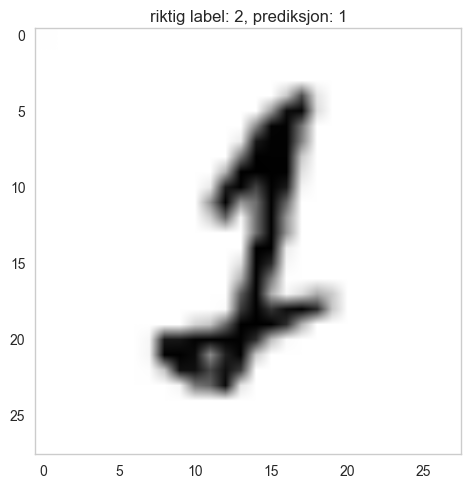

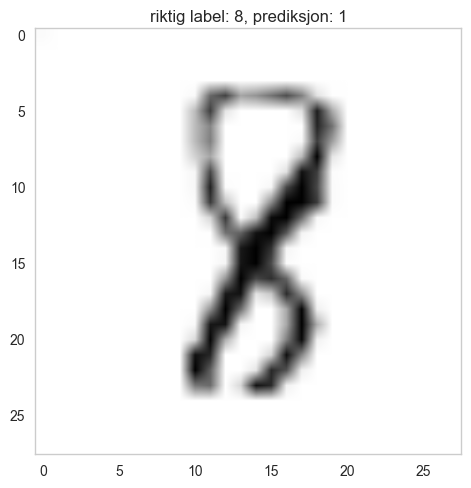

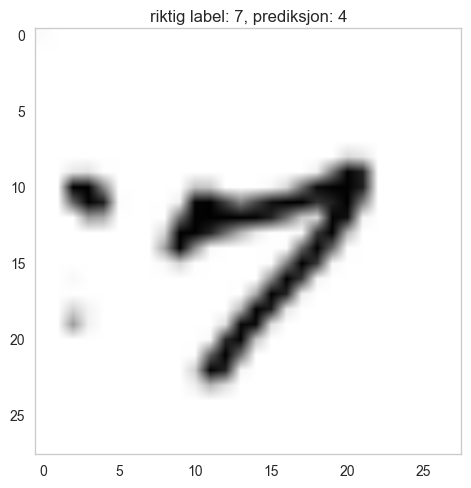

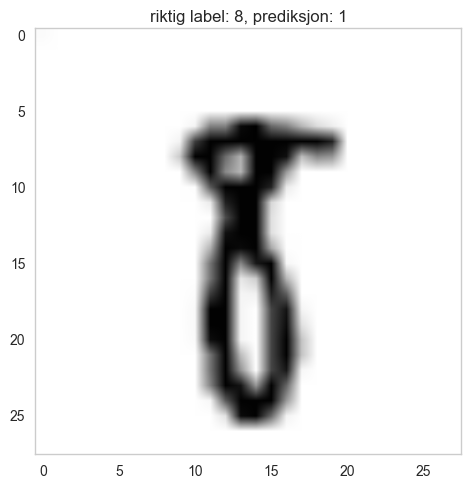

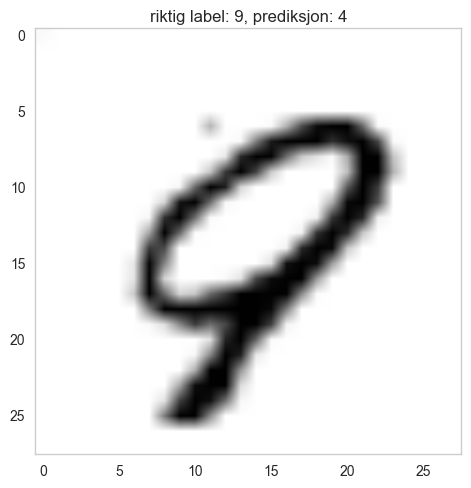

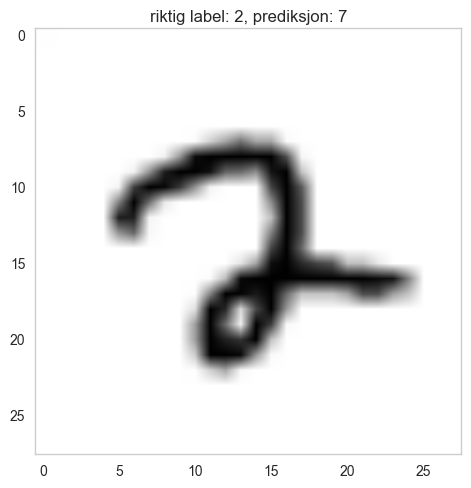

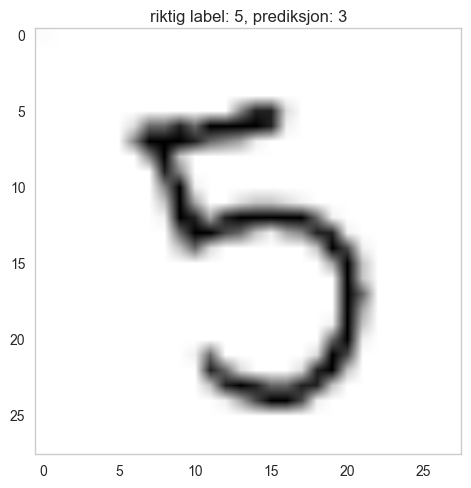

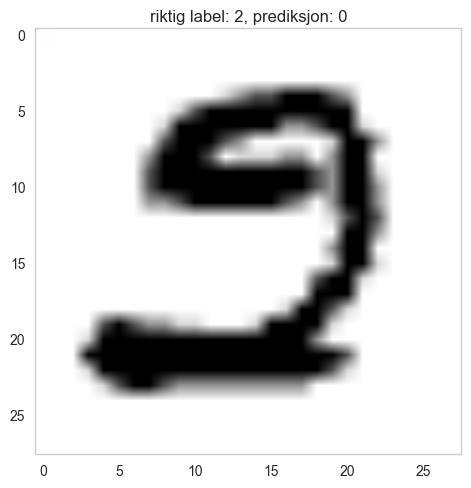

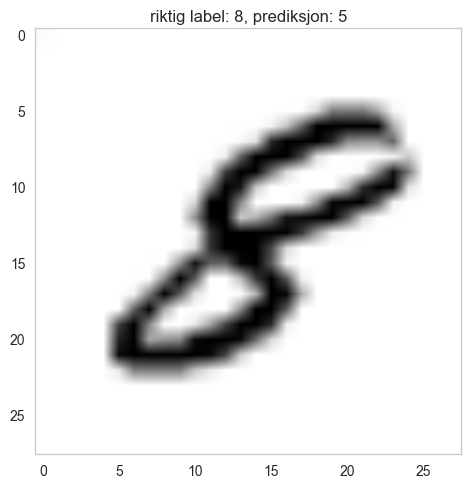

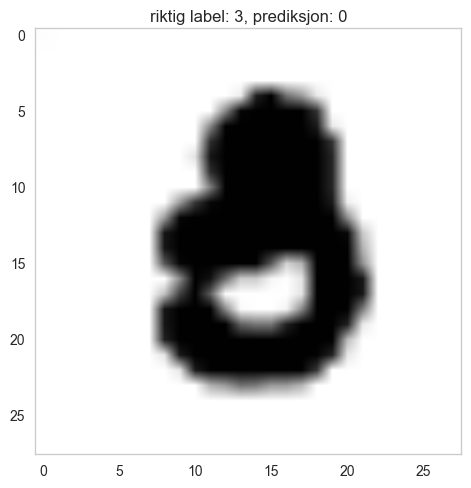

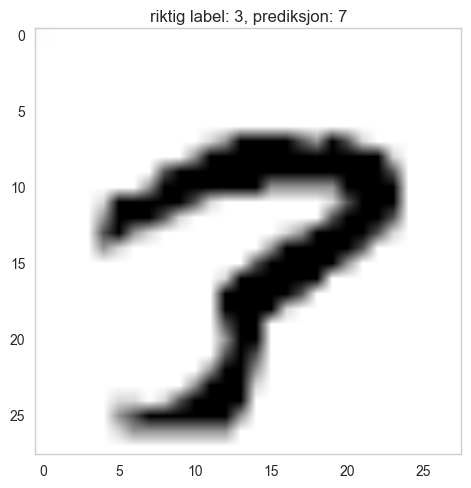

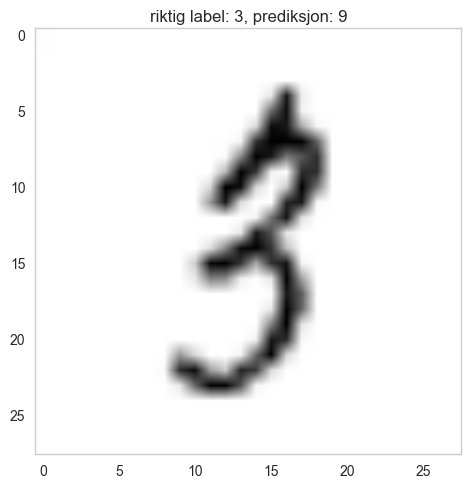

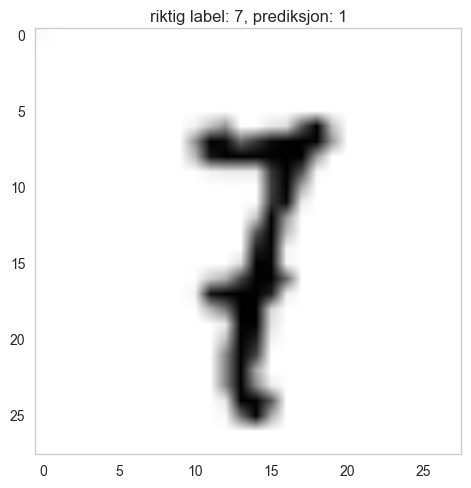

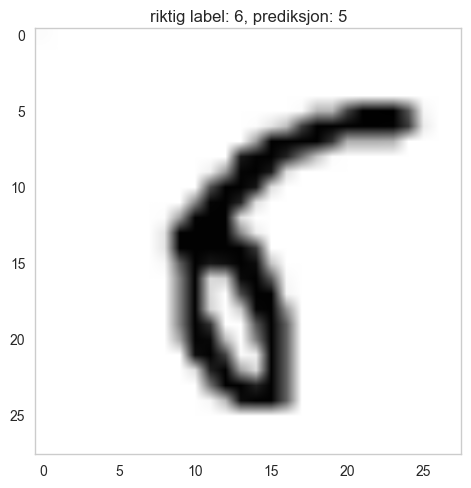

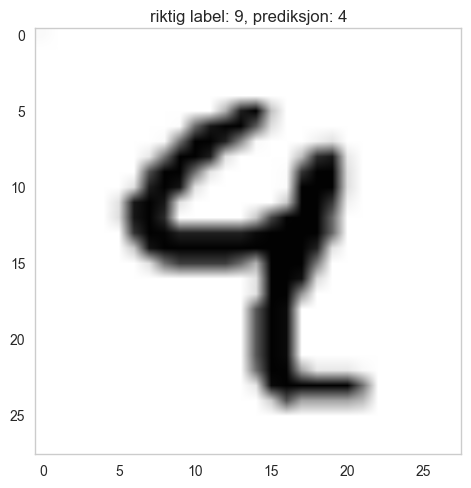

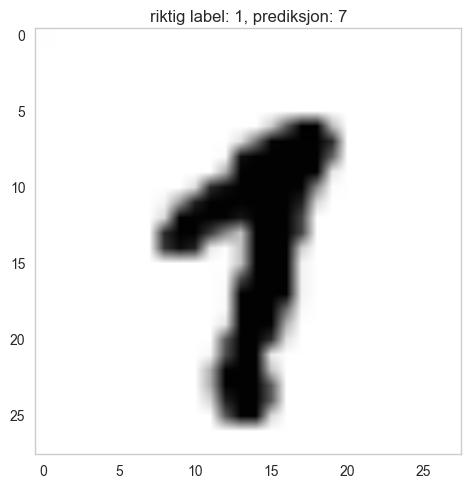

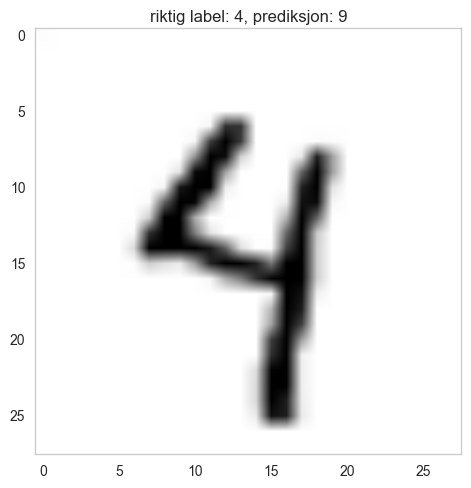

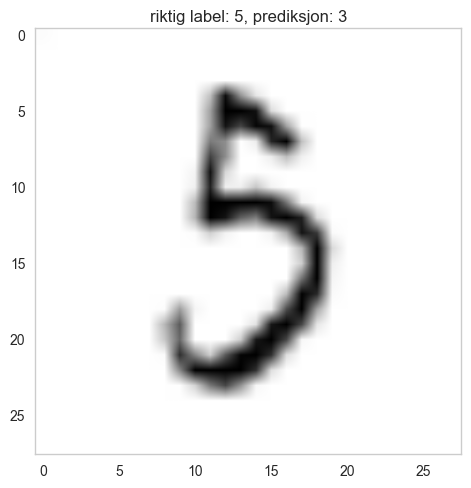

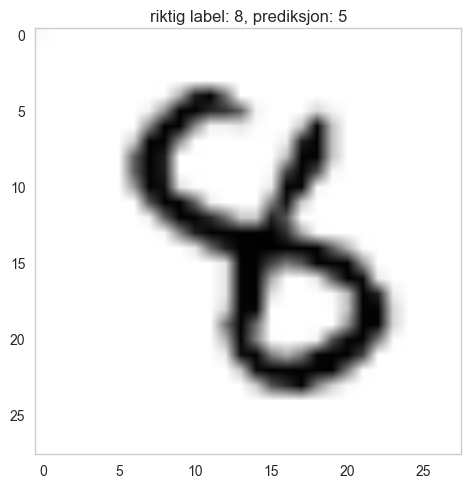

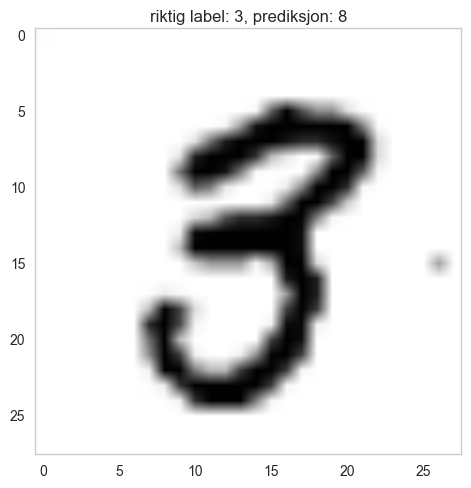

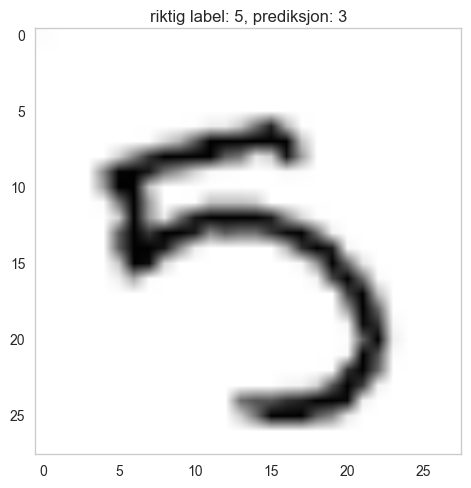

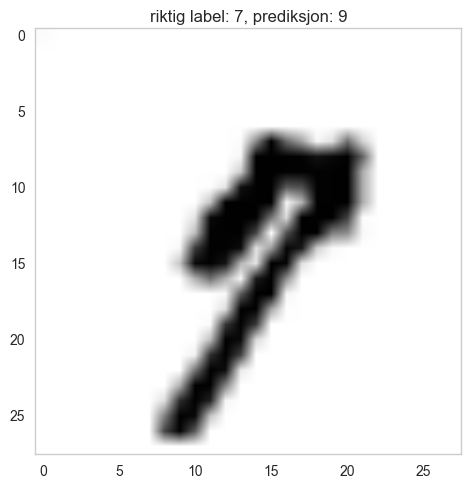

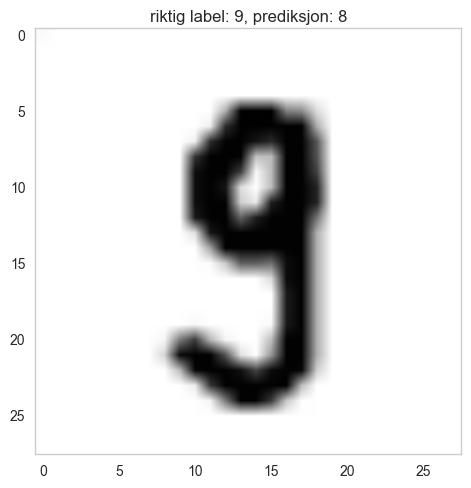

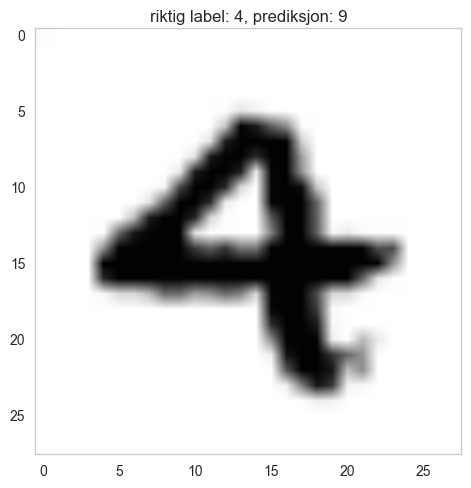

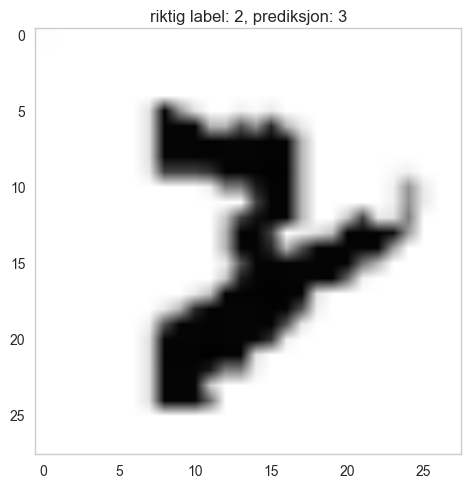

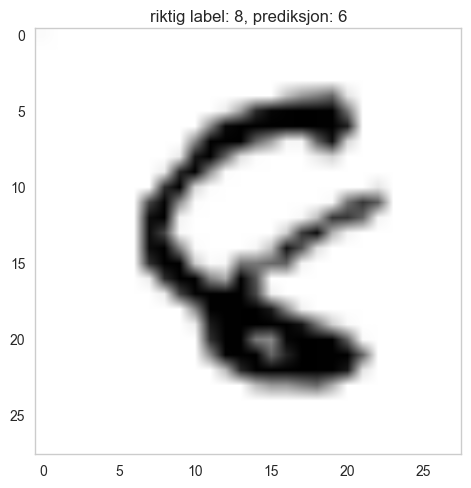

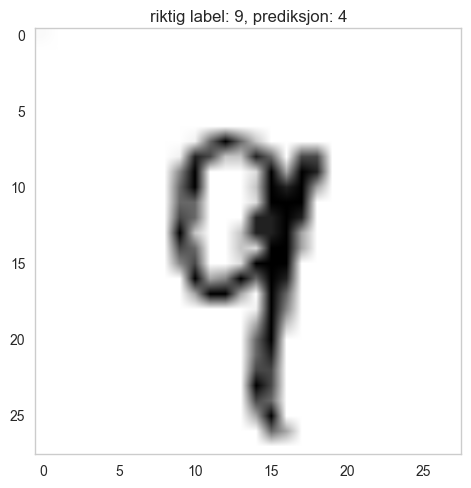

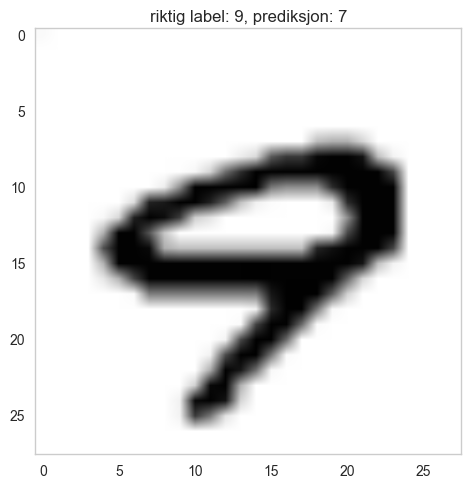

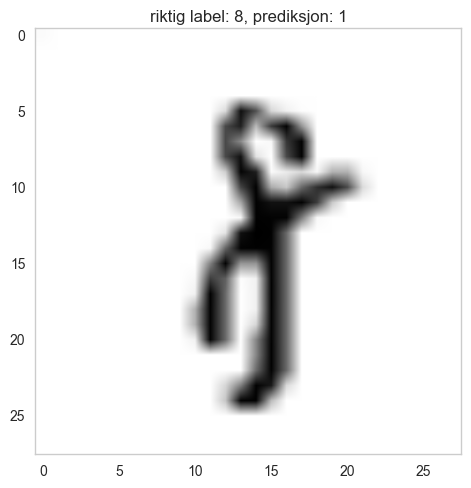

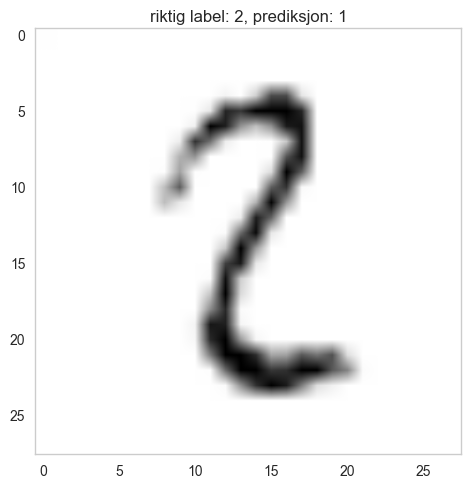

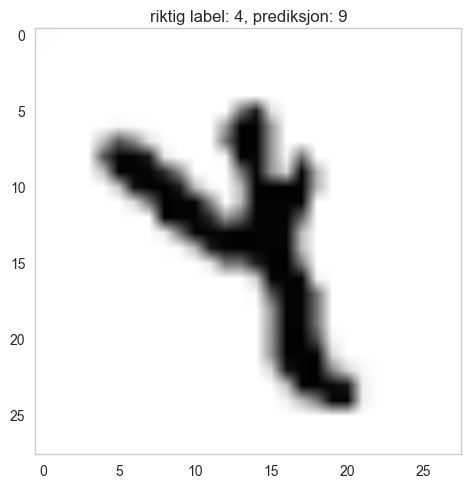

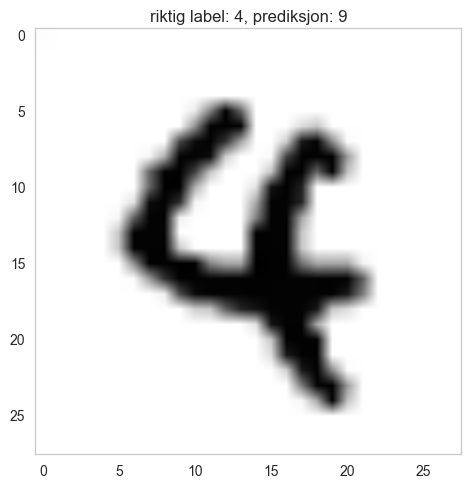

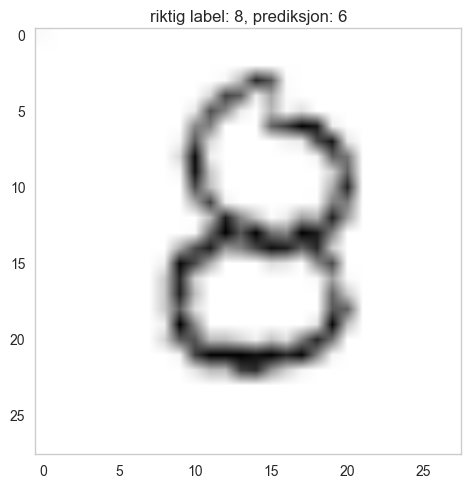

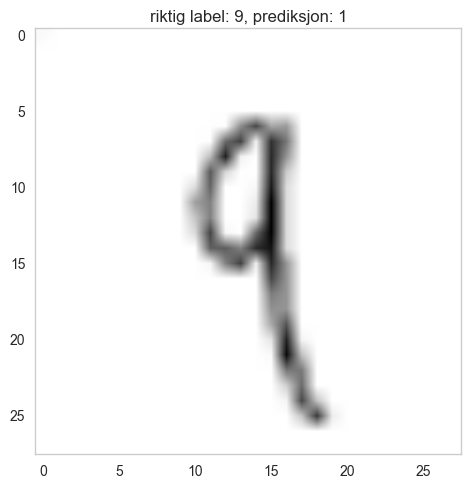

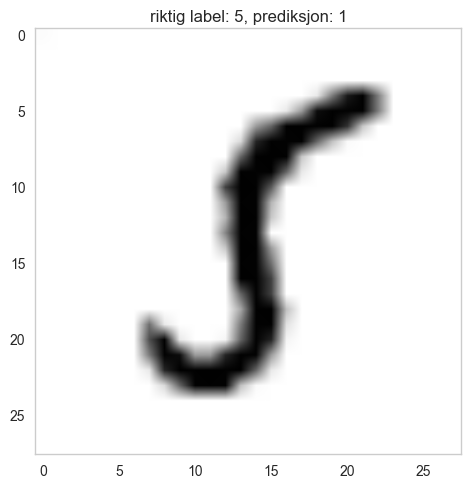

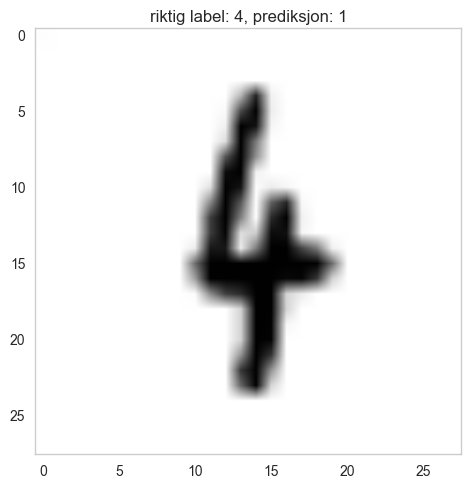

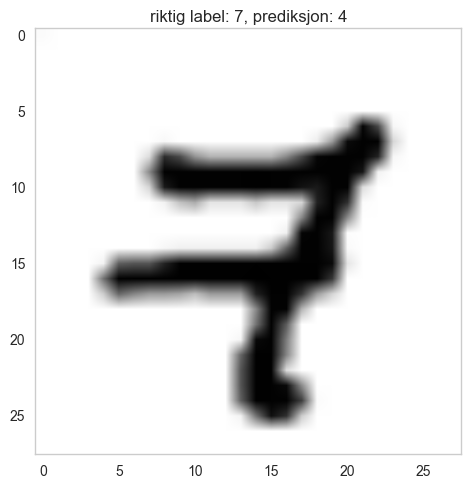

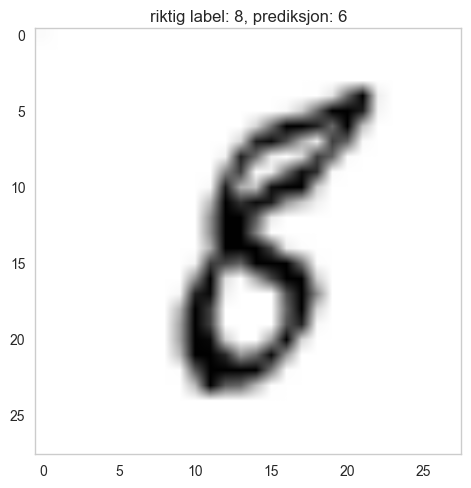

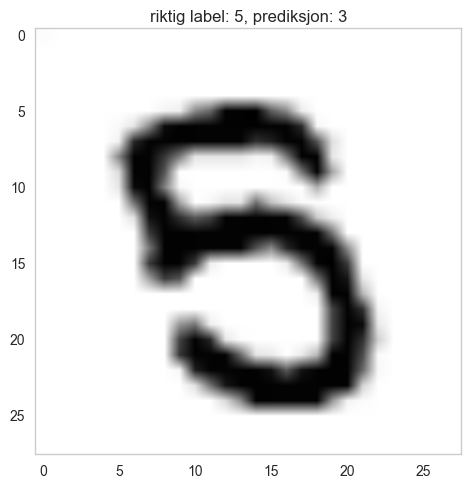

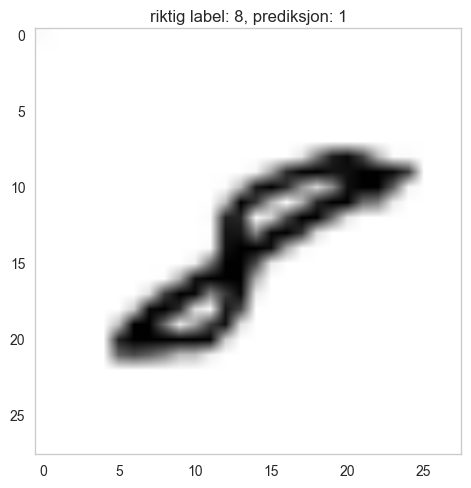

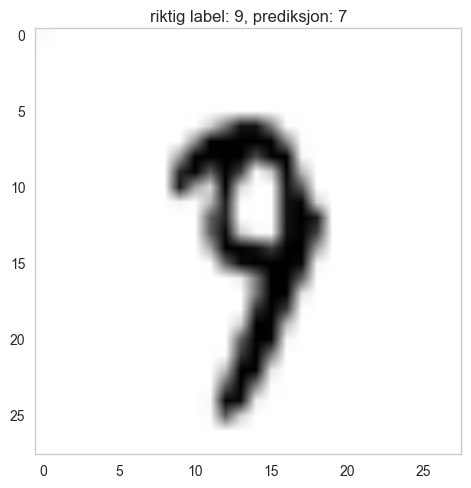

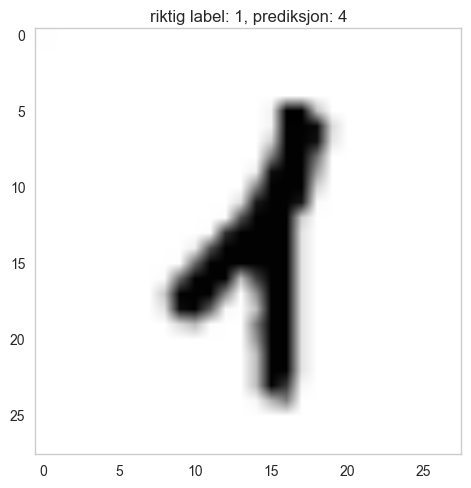

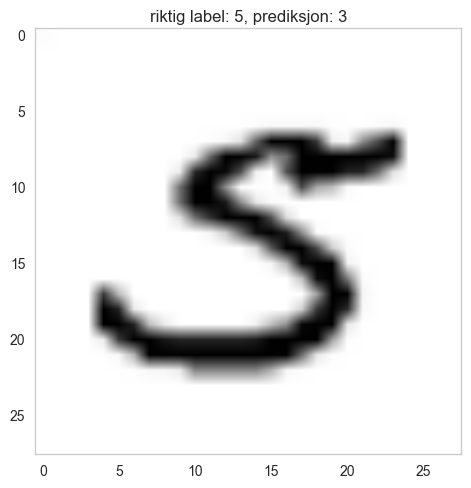

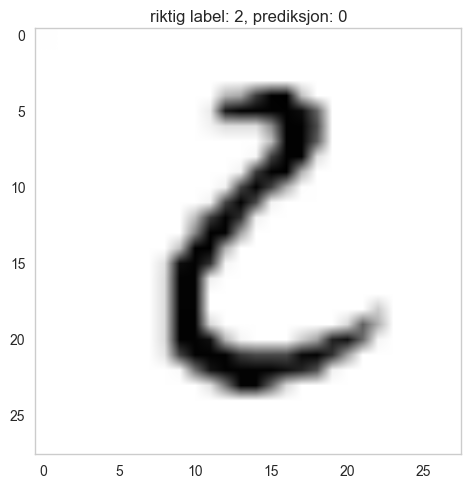

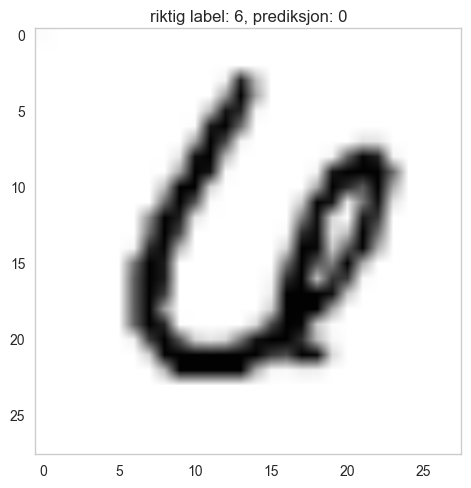

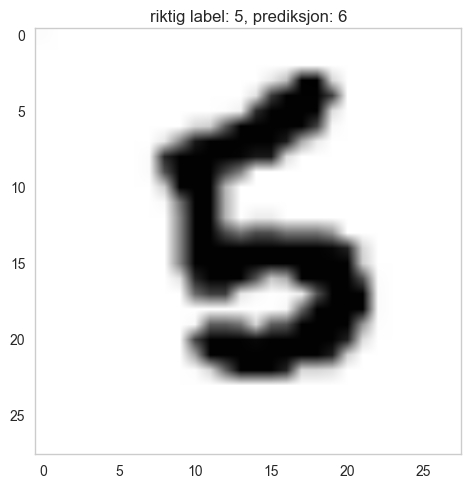

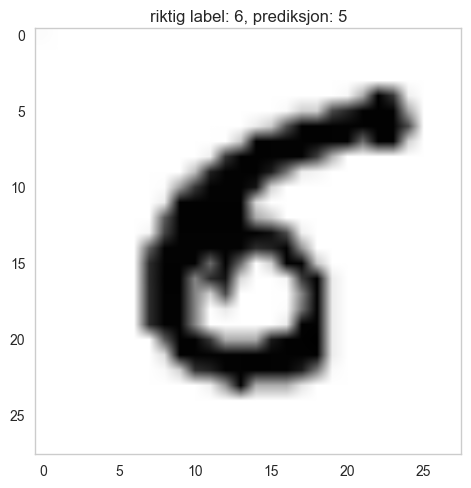

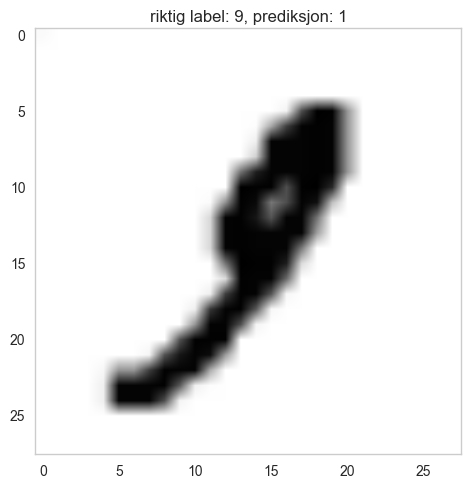

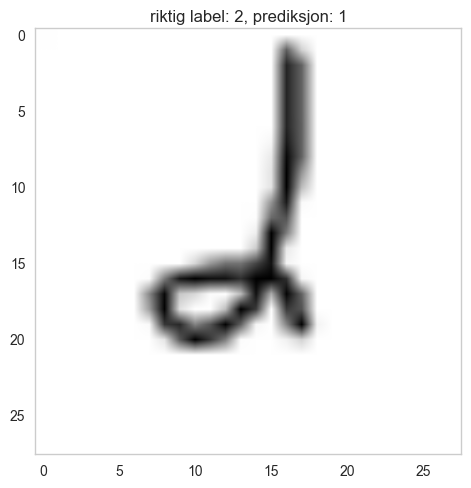

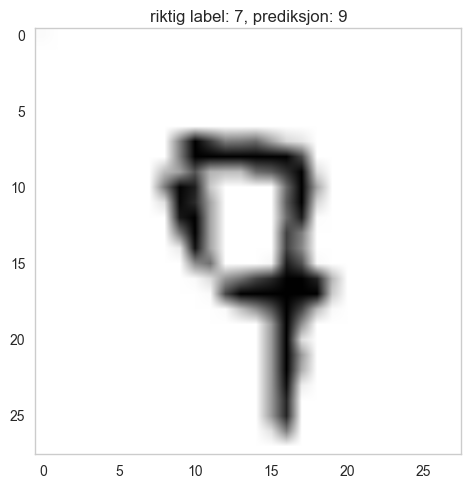

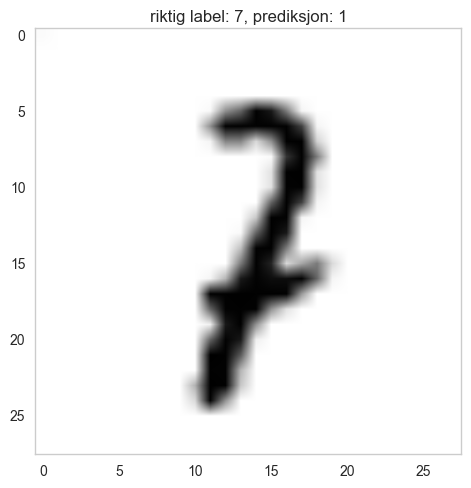

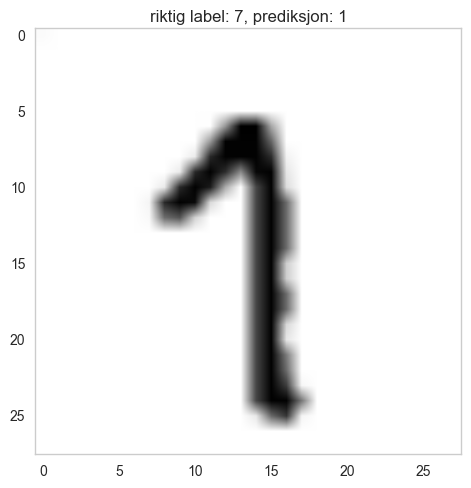

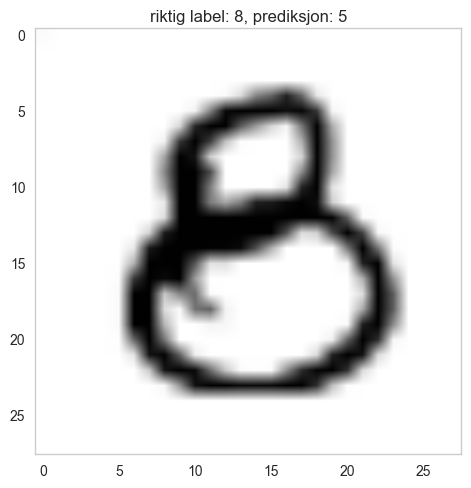

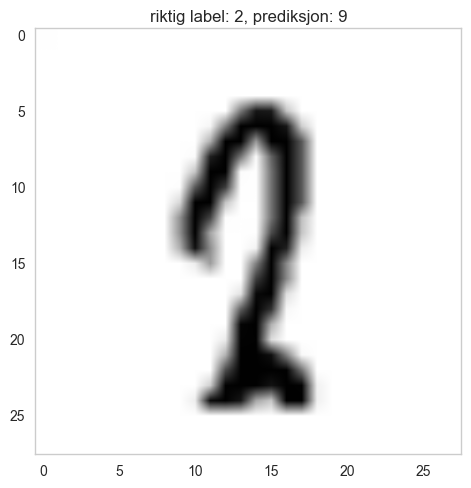

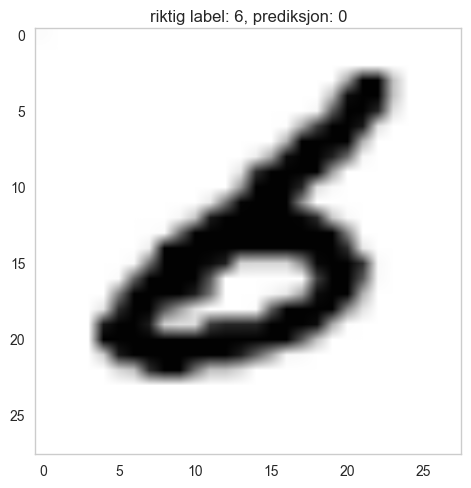

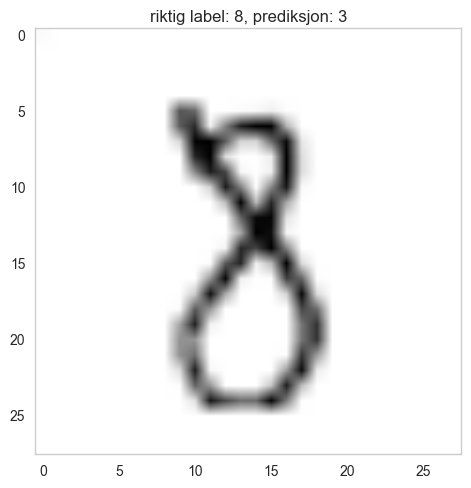

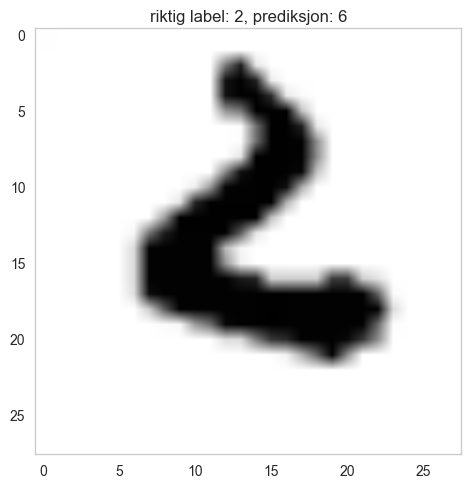

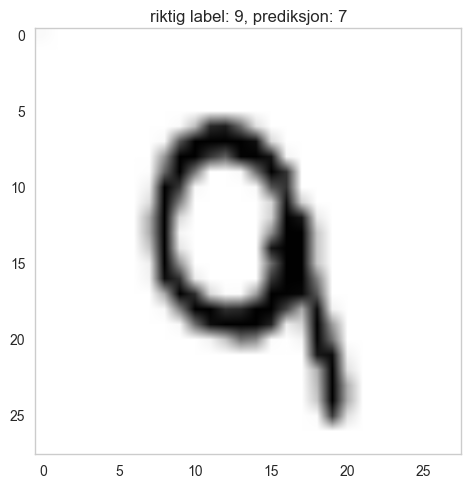

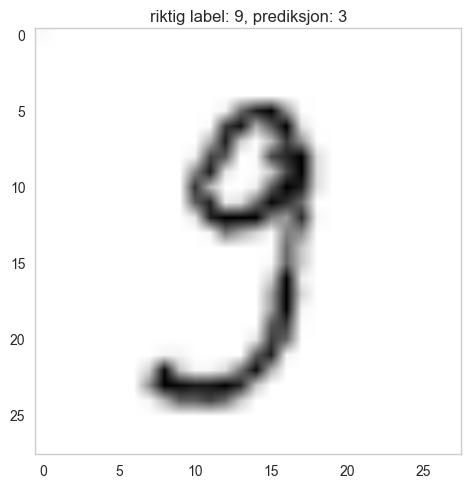

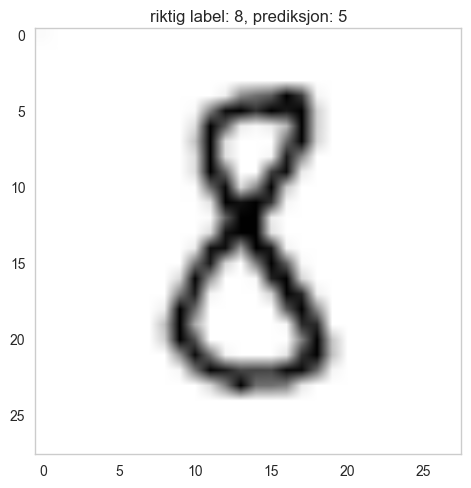

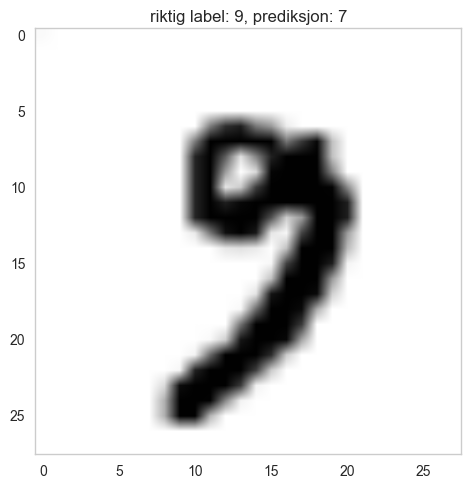

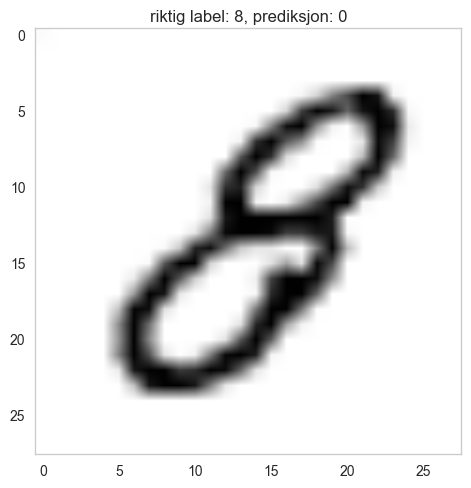

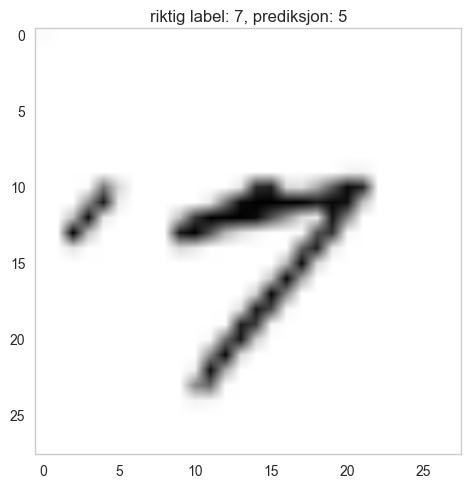

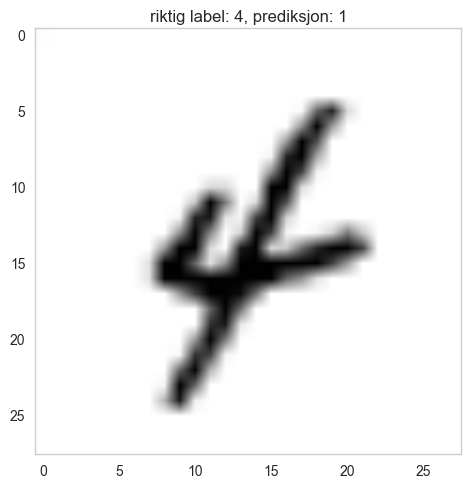

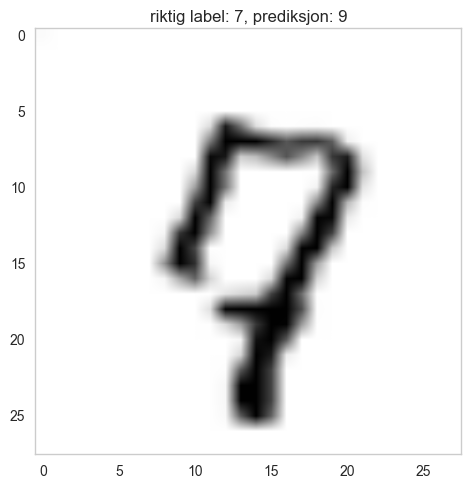

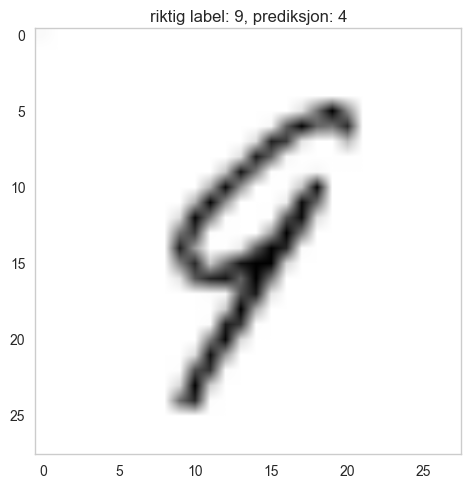

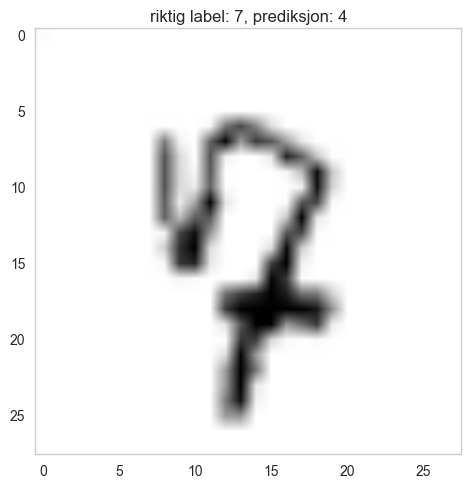

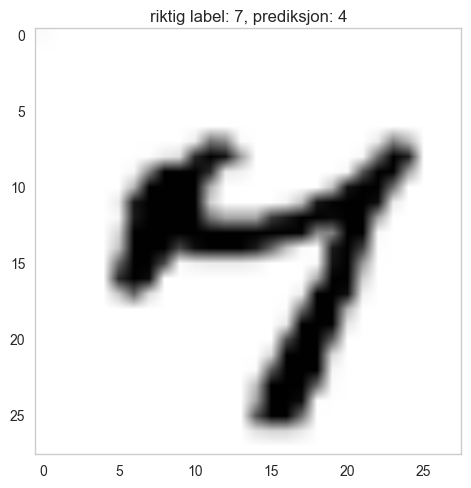

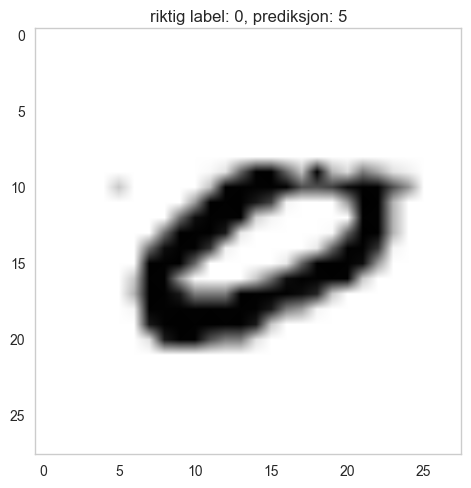

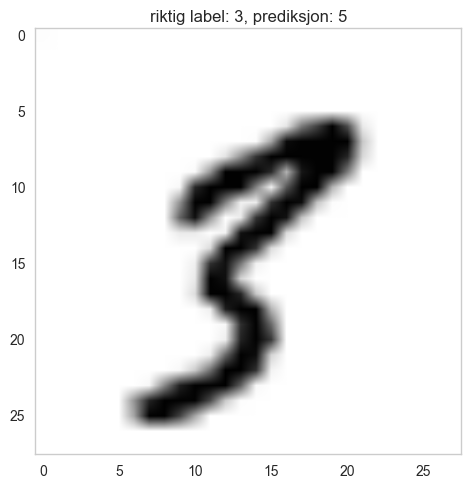

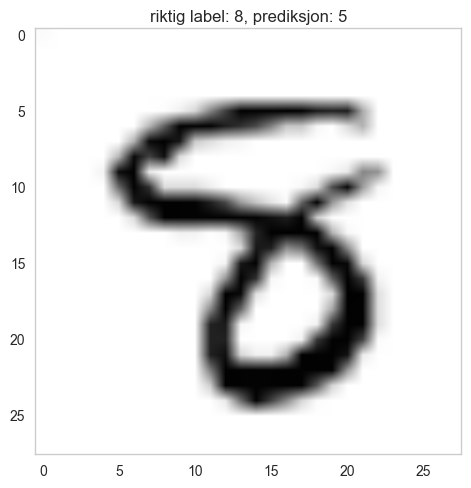

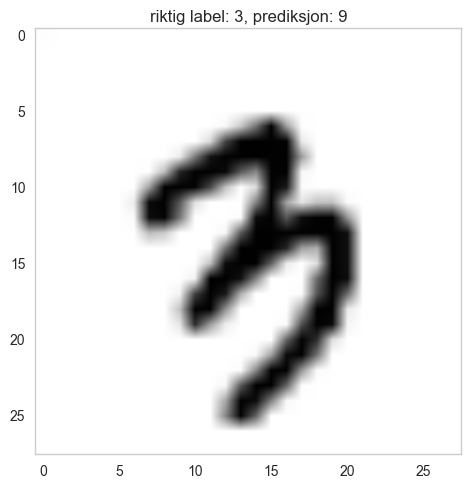

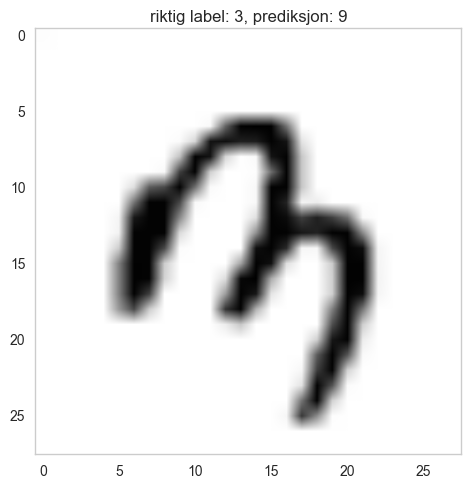

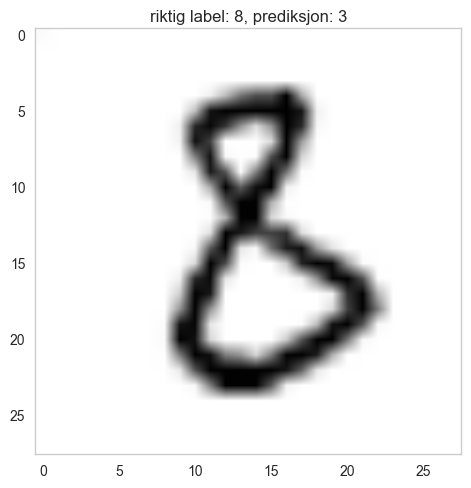

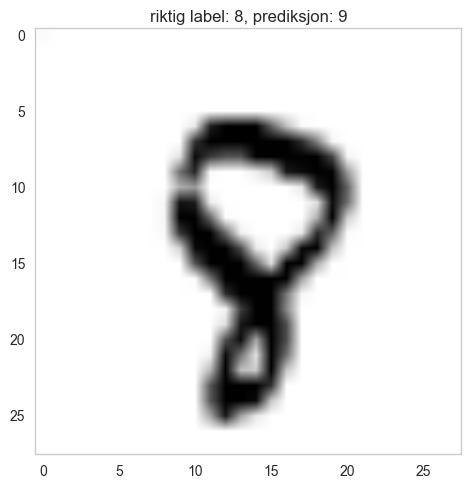

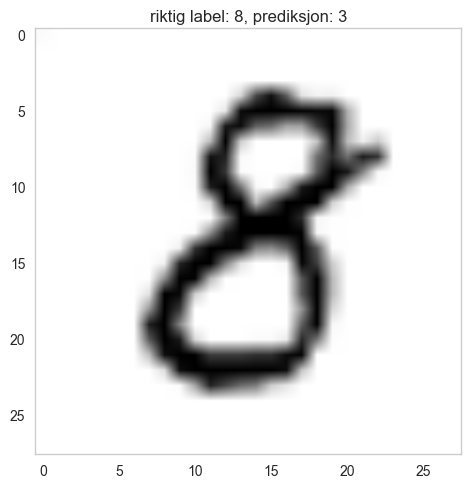

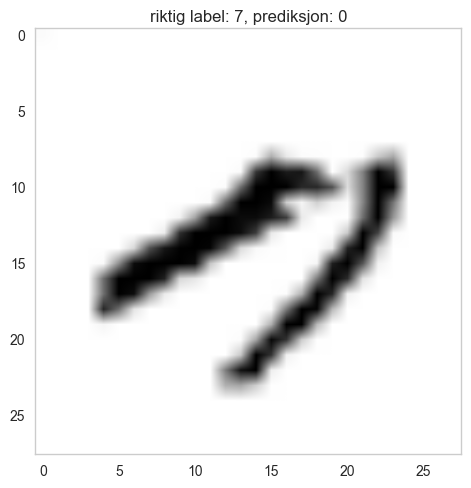

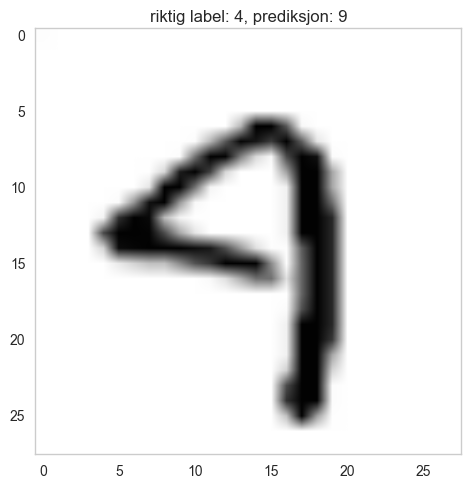

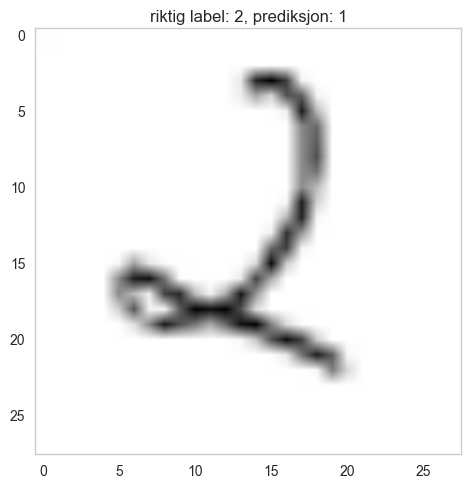

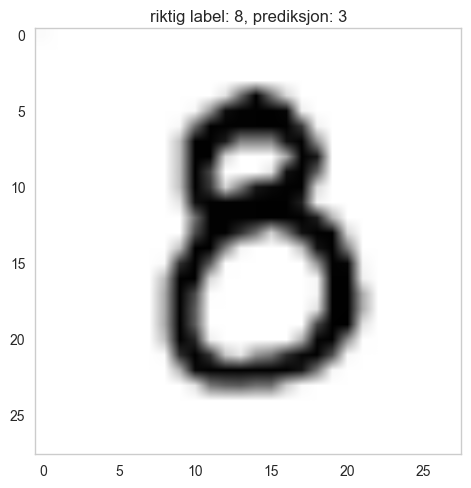

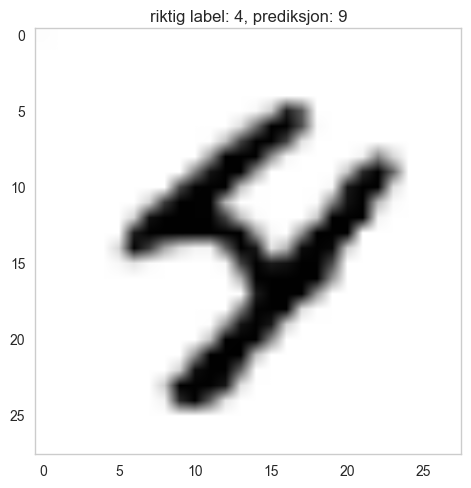

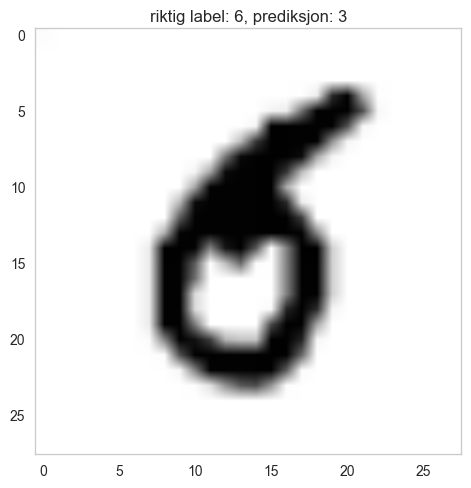

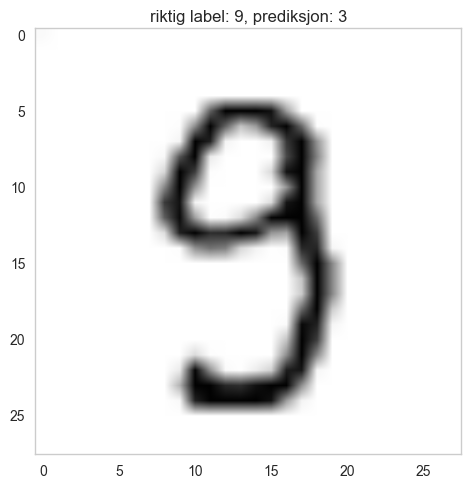

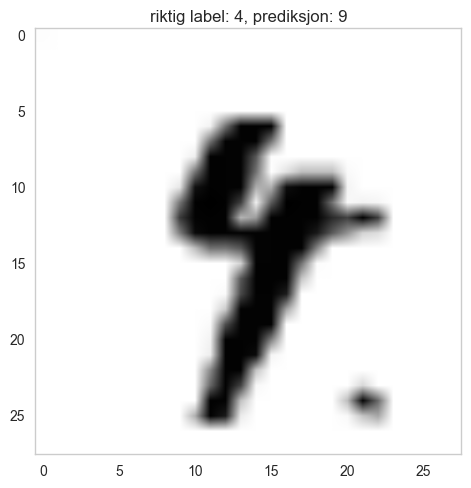

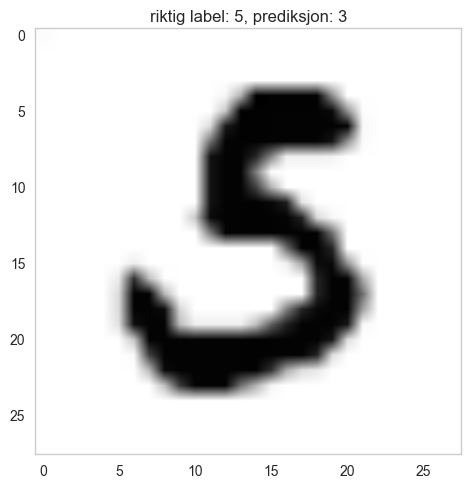

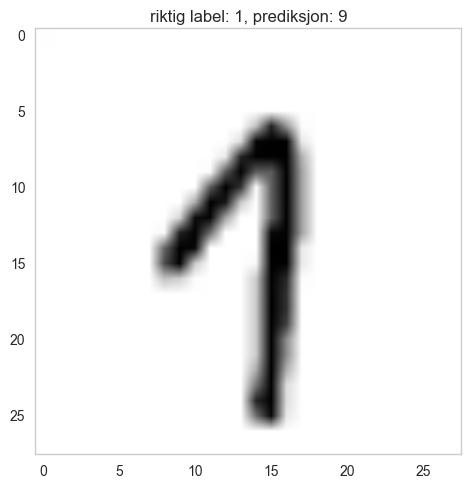

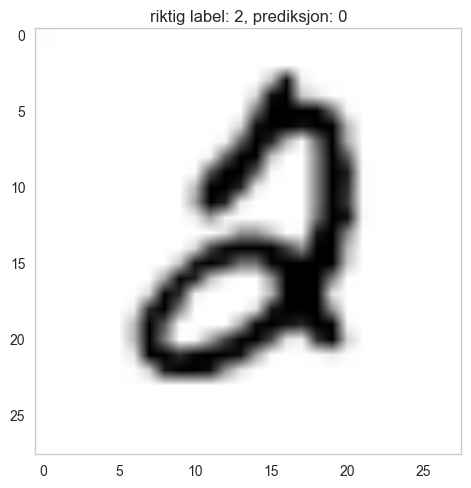

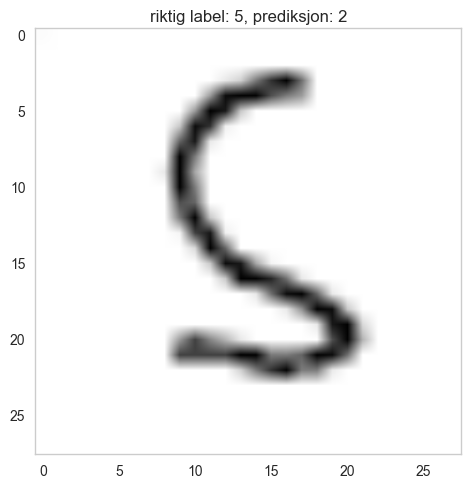

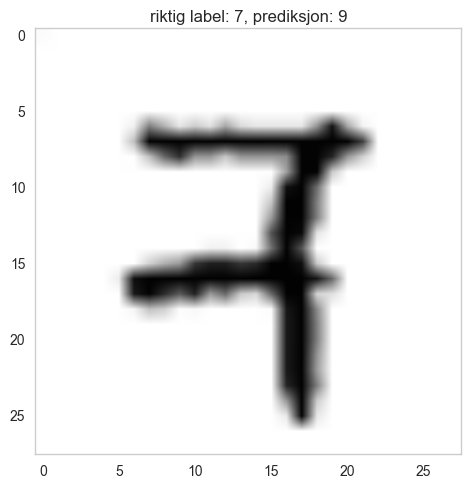

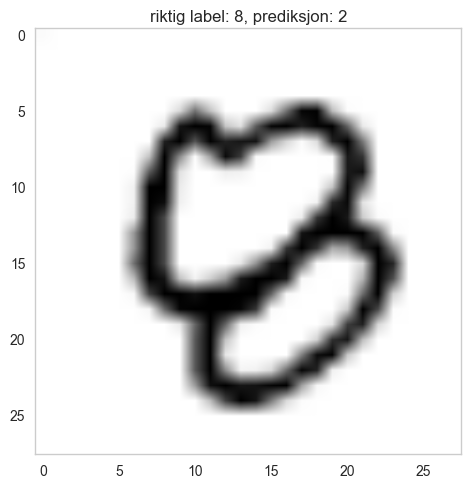

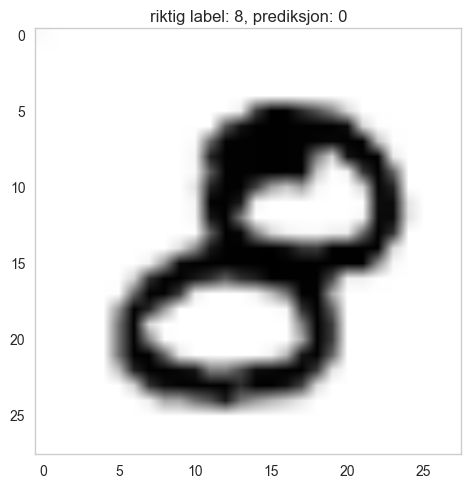

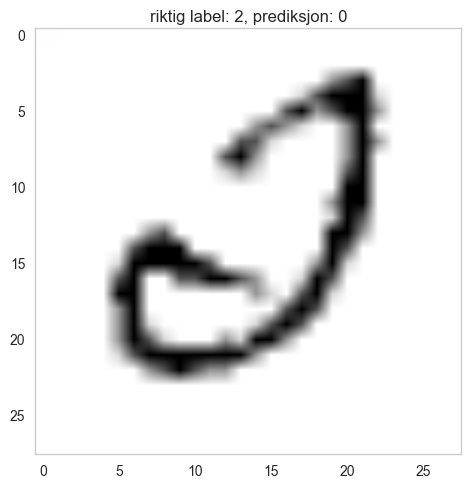

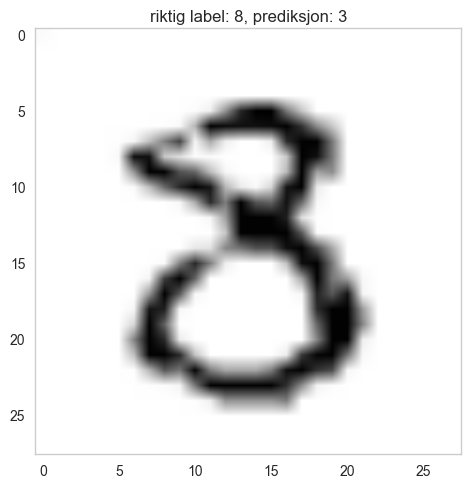

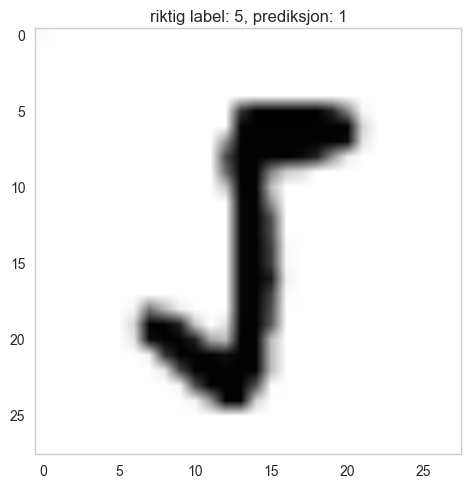

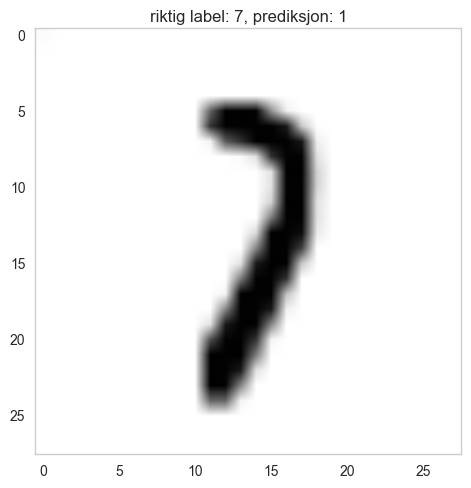

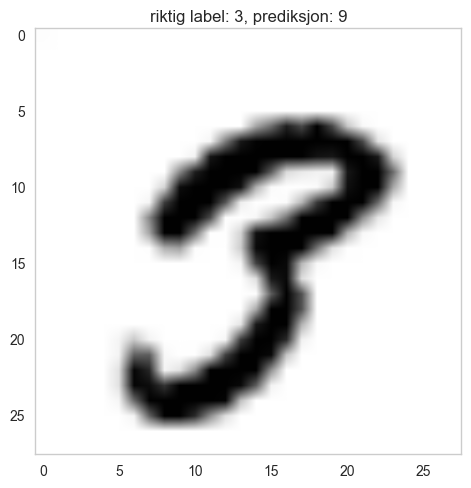

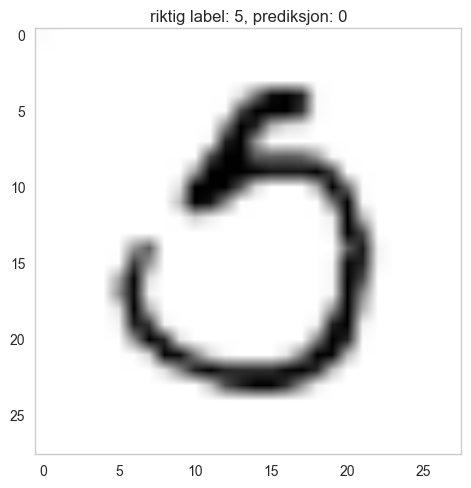

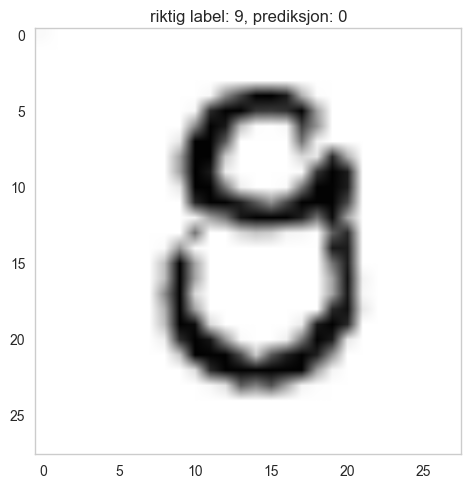

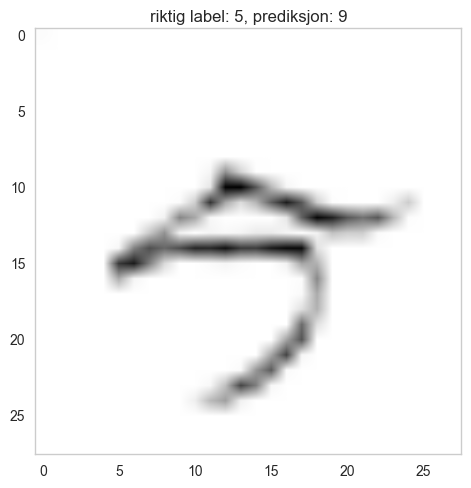

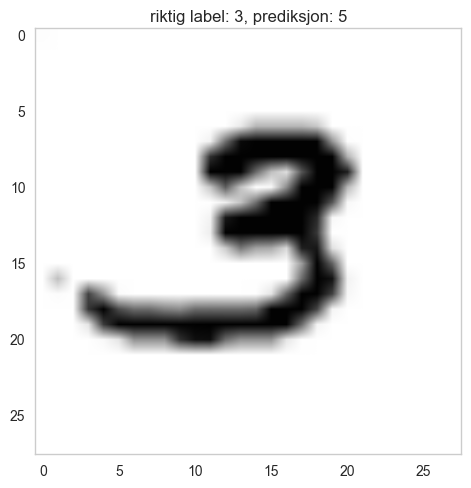

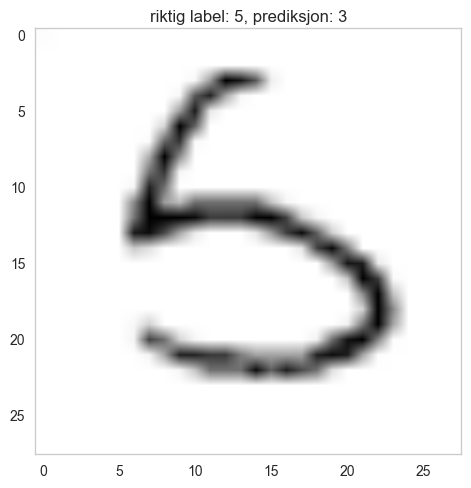

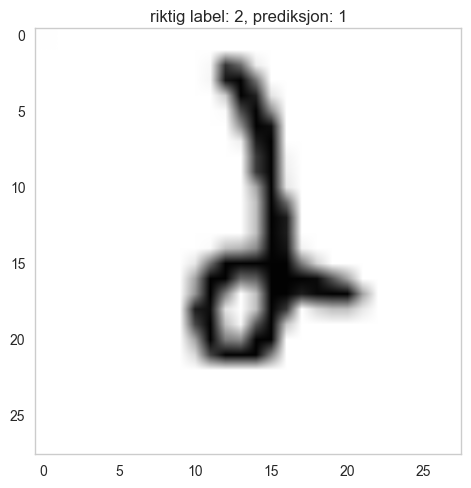

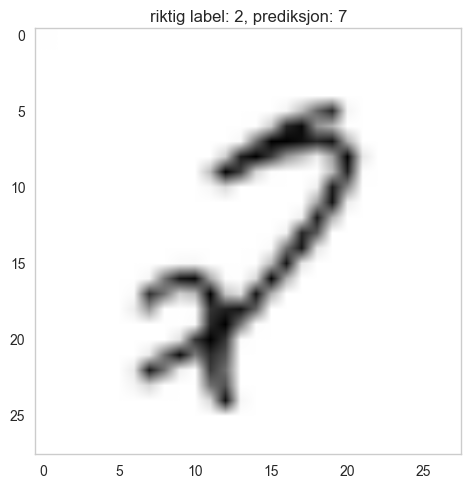

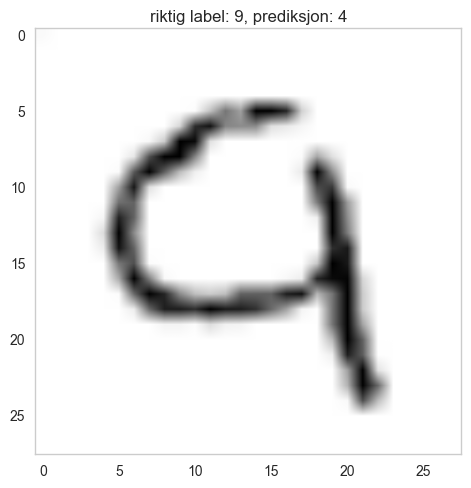

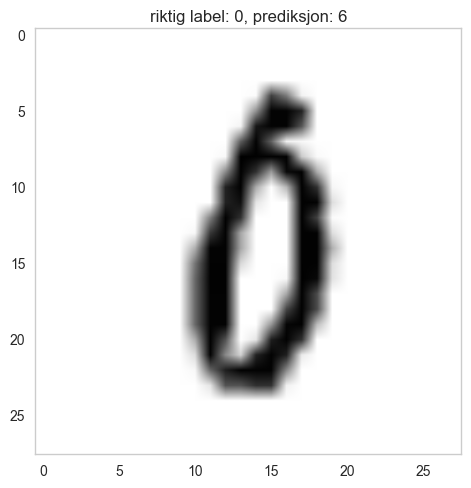

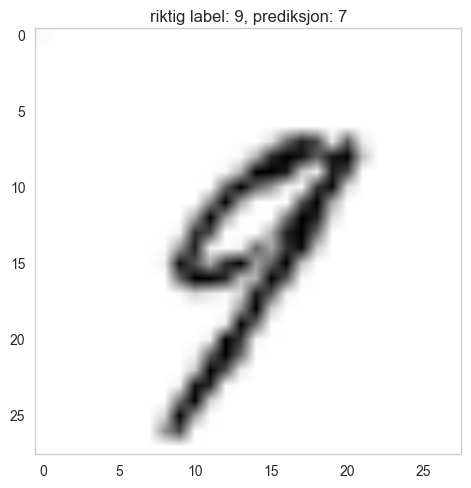

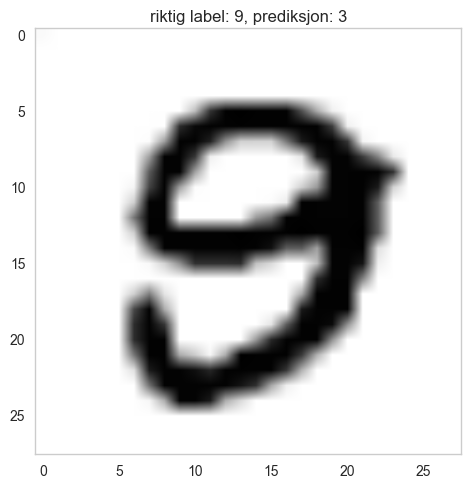

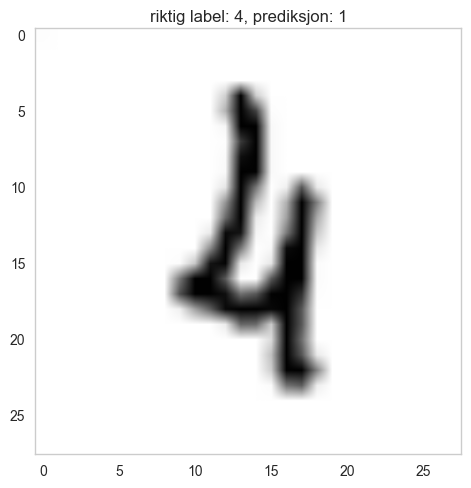

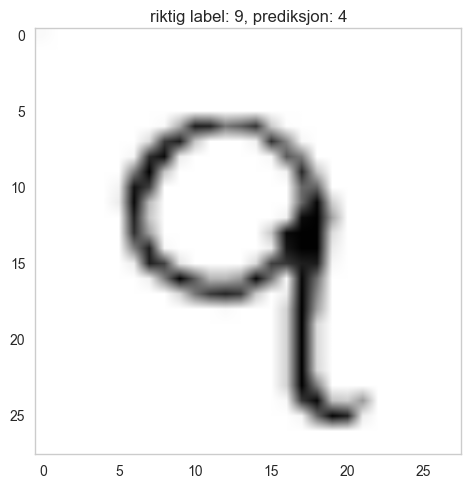

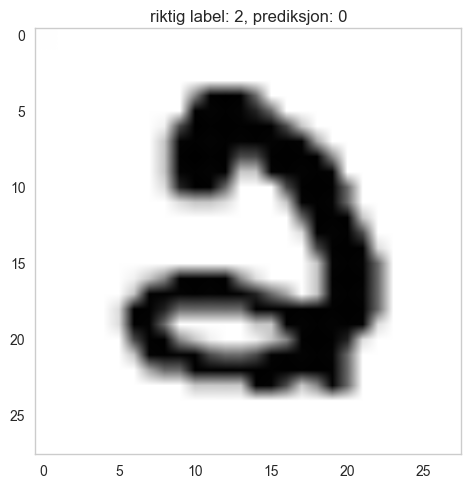

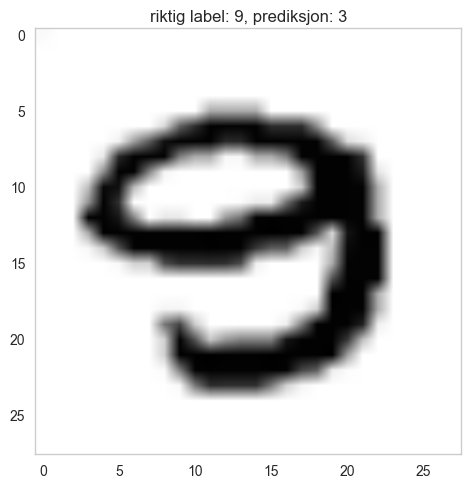

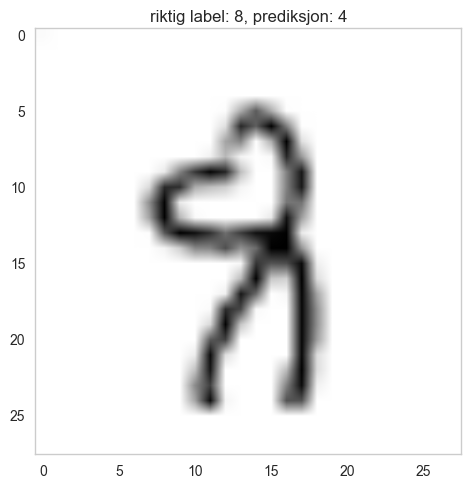

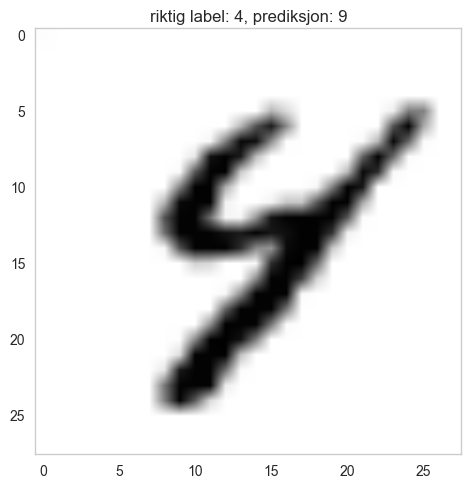

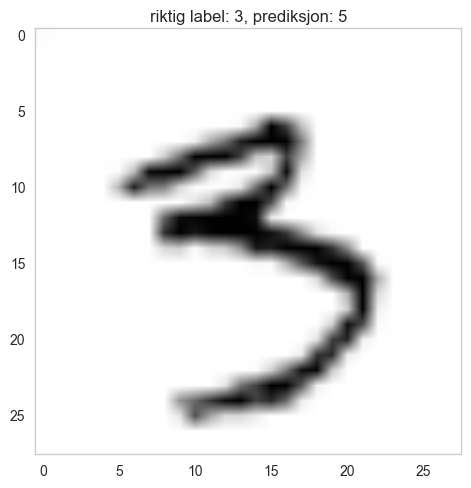

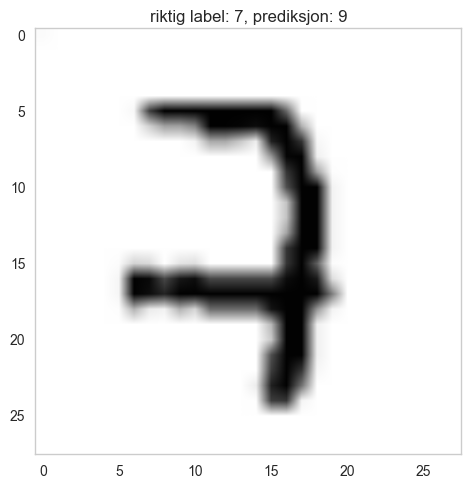

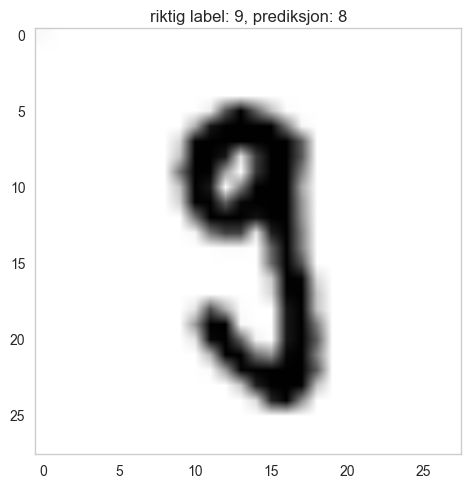

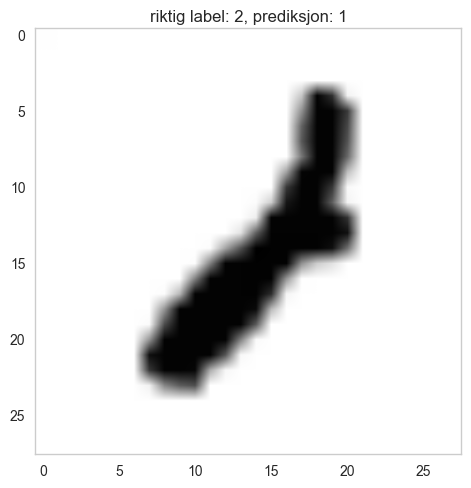

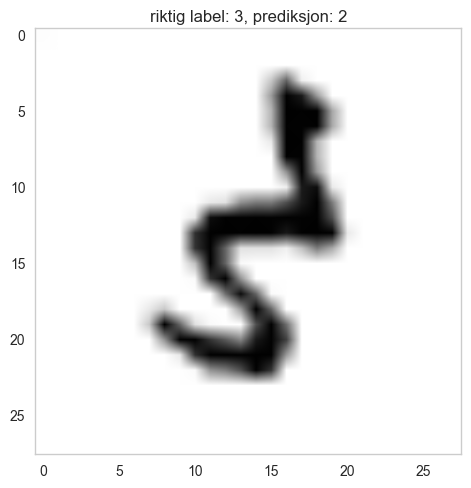

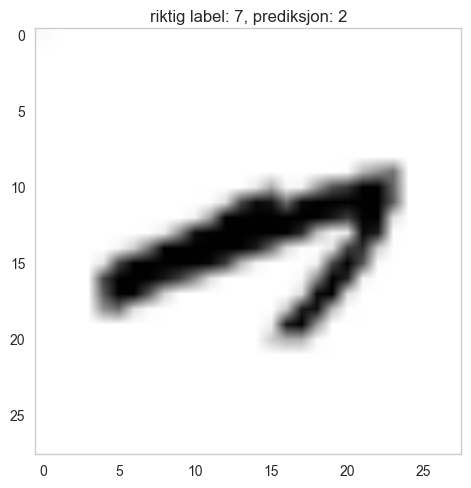

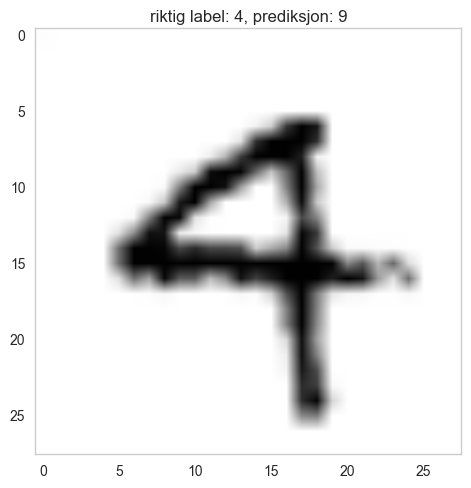

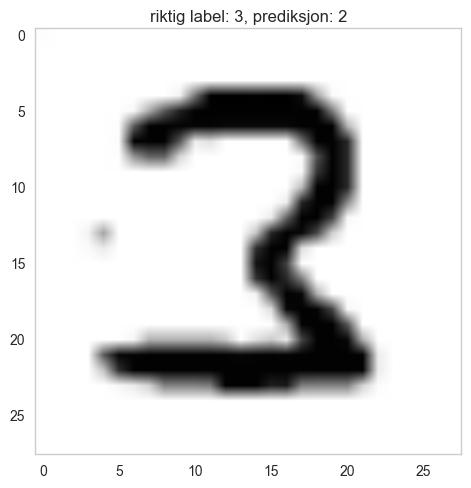

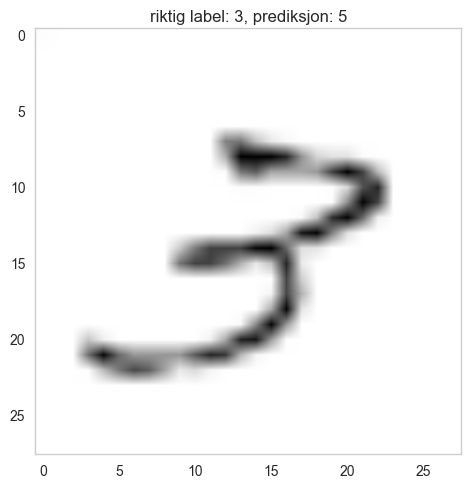

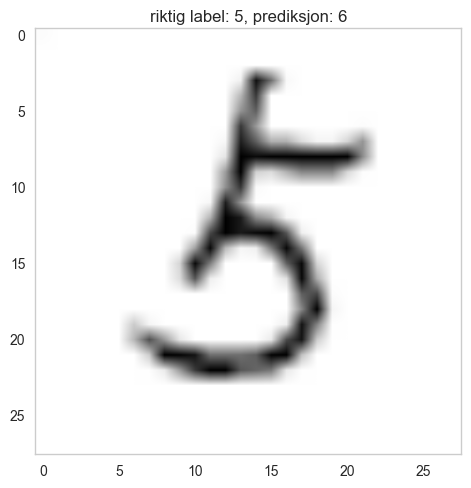

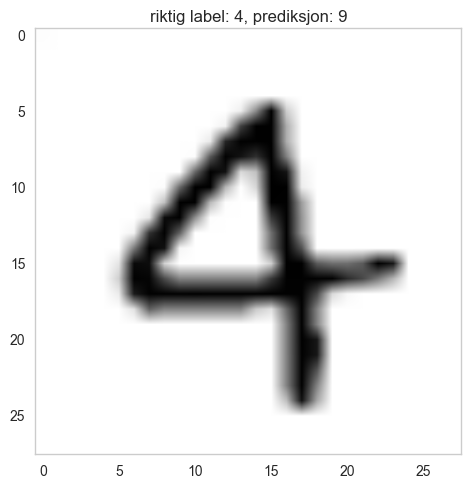

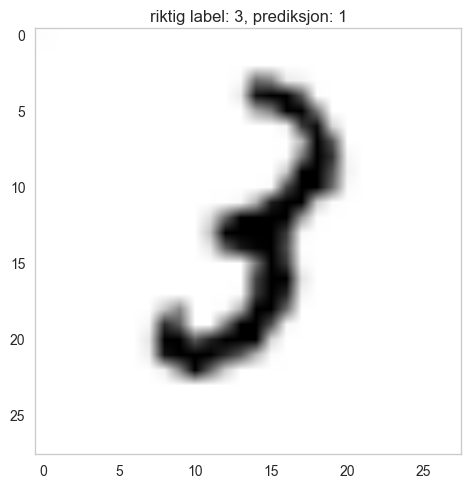

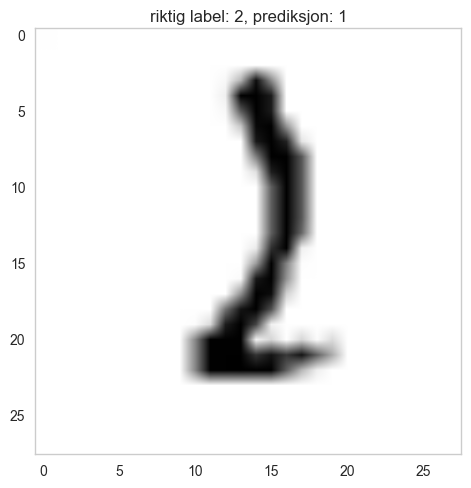

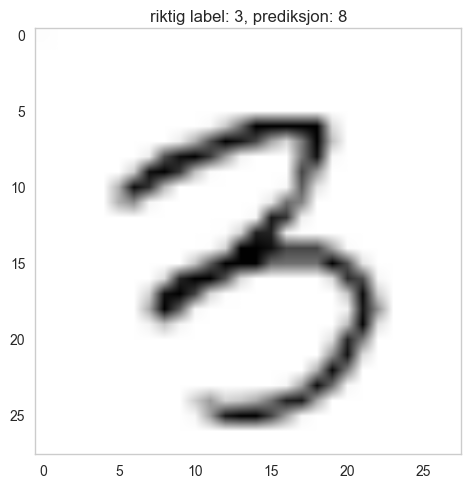

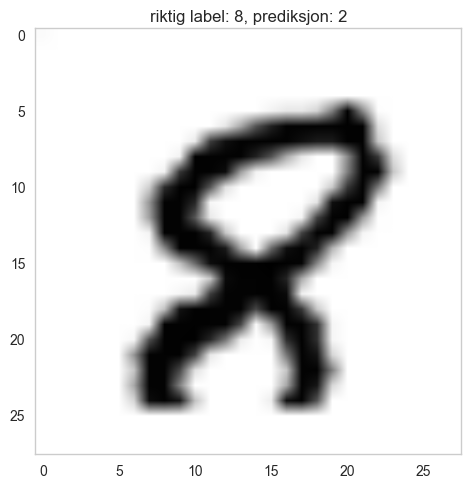

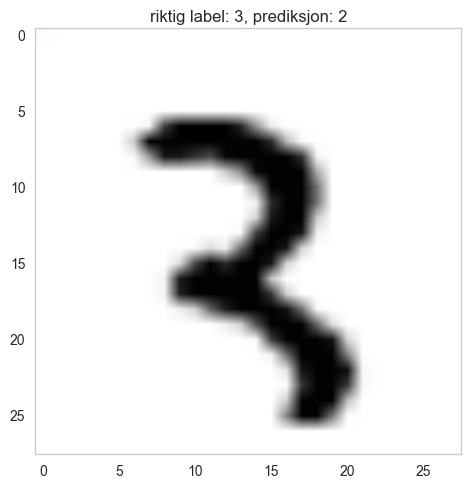

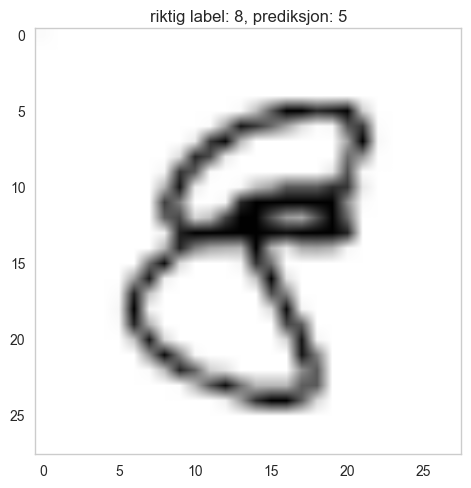

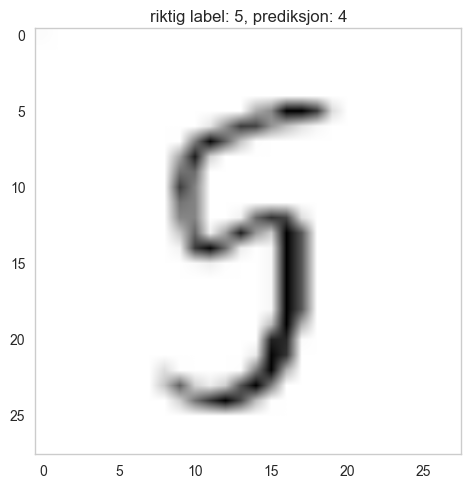

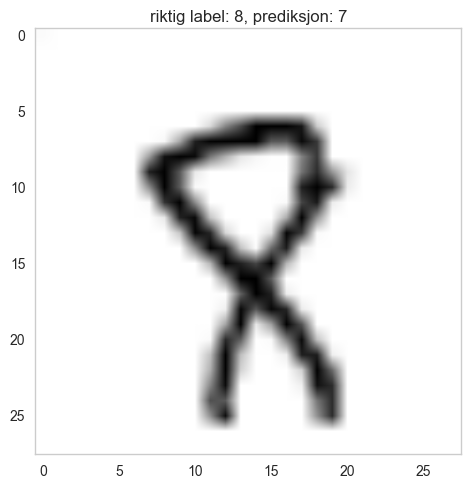

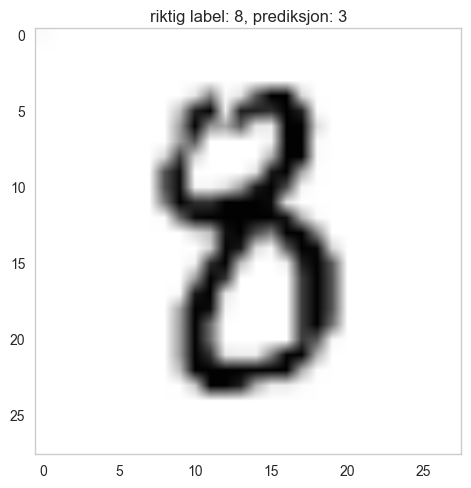

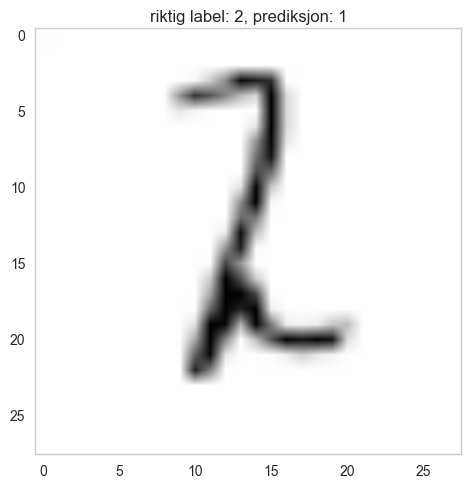

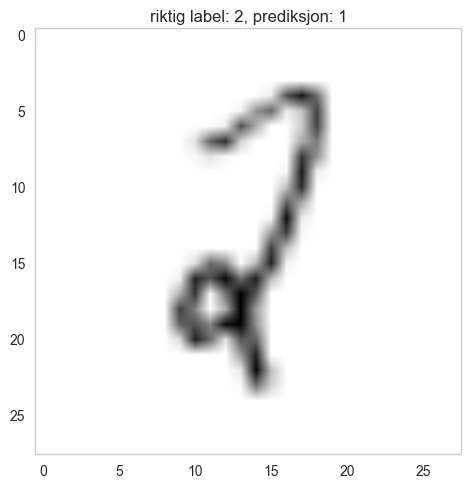

In [12]:
feil_klasse = predictions!=test_target.ravel()

feil_bilder = test_data[feil_klasse]
print feil_bilder.shape

for i,td in enumerate(feil_bilder):
    bilde = np.reshape(td,(28,28))
    plt.imshow(bilde)
    plt.title("riktig label: %d, prediksjon: %d" %(test_target[feil_klasse][i],predictions[feil_klasse][i]))
    
    plt.show()